# LEAD SCORING CASE STUDY

### Problem Statement:

#### X Education is an online education company that sells courses to industry professionals. The company generates a large number of leads from various sources such as website visitors, form fill-ups, and referrals, but its lead conversion rate is only 30%. To improve this conversion rate, X Education wants to identify the most potential leads, also known as "Hot Leads." The company requires a lead scoring model that assigns a lead score to each lead based on the likelihood of conversion. The CEO has set a target lead conversion rate of 80%. The lead scoring model should help the sales team to prioritize potential leads that have a higher conversion chance and enable them to focus on communicating with them. By nurturing these potential leads, X Education can increase their chances of converting them into paying customers and achieve their target conversion rate.

### Goal Of The Case Study:

#### To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Importing important libraries

In [1]:
#Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
leadsdf=pd.read_csv('Leads.csv')
leadsdf.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
leadsdf.shape

(9240, 37)

In [4]:
leadsdf.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
leadsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# checking for duplicate variables

sum(leadsdf.duplicated(subset='Prospect ID'))
sum(leadsdf.duplicated(subset='Lead Number'))

0

### Inference: 
    

####  No duplicate values exist in 'Prospect ID' and 'Lead Number'

## Step 3: Data Cleaning

#### Select variable not providing any usefull info regarding the data, It is better to better treat this value as missing value 

In [7]:
# Searching select variable in all column of datafram

selectcols= leadsdf.isin(['Select']).any()
selectcols

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [8]:
# replace all the select in the column with nan

leadsdf.replace('Select', np.nan, inplace=True)

In [9]:
# Cross checking if select is still present or not

selectcols = leadsdf.isin(['Select']).any()
selectcols

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education               False
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [10]:
#Calculating the missing value percentage in each column

round(leadsdf.isnull().sum()/len(leadsdf)*100, 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### Inference:

#### There are many columns which having missing values. So drop the column which have more than 40% missing values first.

In [11]:
# Dropping the column having missing values more than 40%

leadsdf = leadsdf.drop(leadsdf.loc[:, list((round(leadsdf.isnull().sum()/len(leadsdf)*100, 2)>=40))].columns, 1)


In [12]:
# Again checking missing values in column

round(leadsdf.isnull().sum()/ len(leadsdf)*100,2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [13]:
leadsdf.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Checking Unique values in categorical columns



In [14]:
ColumnList=['City', 'Specialization', 'Tags', 'What matters most to you in choosing a course',
              'What is your current occupation', 'Country', 'Last Activity', 'Lead Source']

for column in ColumnList:
    perc=round(leadsdf[column].value_counts(normalize=True)*100,2)
    print(f"value_counts % for {column.upper()}:\n")
    print(perc,"\n")

value_counts % for CITY:

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64 

value_counts % for SPECIALIZATION:

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25

### Insights:

#### City: City has 39.71 % missing values. Imputing missing values with Mumbai will create data imbalance. So its better to drop city column

#### Specialization: 36.58% missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. Creating additional category called 'Others' is better option.

#### What matters most to you in choosing a course: 29.32% missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight. Hence, we can drop this column.

#### Tags: 36.29% missing values. Tags are assigned to customers indicating the current status of the lead. This column will not be useful for modeling. Hence it can be dropped.

#### What is your current occupation: 29.11% missing values. We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

#### Country: X Education sells online courses and appx 96% of the customers are from India. This is massively skewed and will not provide any insight. Hence, we can drop this column.

#### Last Activity: "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.

#### Lead Source: "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

In [15]:
# Dropping the column

leadsdf.drop(['City', 'Tags', 'Country', 'What matters most to you in choosing a course'], axis=1, inplace=True)
leadsdf.shape

(9240, 26)

In [16]:
# As we discussed above, now imputing the values

missing_values={'Specialization':'Others', 'What is your current occupation':'Unemployed',
                'Last Activity':'Email Opened', 'Lead Source':'Google'}

leadsdf = leadsdf.fillna(value = missing_values)


In [17]:
# Again checking missing values %

round(leadsdf.isnull().sum()/len(leadsdf)*100,2).sort_values(ascending=False)


TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

In [18]:
# Above missing values can imputed with mode 
# Total Visits and page per visit values to be imputed with mode

leadsdf['TotalVisits'].fillna(leadsdf['TotalVisits'].mode()[0],inplace=True)
leadsdf['Page Views Per Visit'].fillna(leadsdf['Page Views Per Visit'].mode()[0],inplace=True)

In [19]:
#Again Checking for missing value

round(leadsdf.isnull().sum()/len(leadsdf)*100,2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

#### Dropping the column which have only one unique value



In [20]:
leadsdf.describe(include='object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine  ...  \
count                             9240   9240     9240  ...   
unique                               6      2        1  ...   
top                         Unemployed     No       No  ...   
freq                              8290   9226     9240  ...   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407  

[4 rows x 21 columns]

### Inference:

#### The column have only 1 unique value and can be dropped as follows



#### 1)'Magazine'
#### 2)'Receive More Updates About Our Courses'
#### 3)'Update me on Supply Chain Content'
#### 4)'Get updates on DM Content'
#### 5)'I agree to pay the amount through cheque'

In [21]:
# Dropping above columns 

cols_to_drop = ['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                    'Get updates on DM Content','I agree to pay the amount through cheque']
leadsdf.drop(cols_to_drop, axis = 1, inplace = True)


In [22]:
leadsdf.shape

(9240, 21)

In [23]:
#Dropping some other column as they of no use in modeling

leadsdf.drop(['Prospect ID', 'Lead Number', 'Last Notable Activity'], axis=1, inplace=True)

In [24]:
leadsdf.shape

(9240, 18)

### Checking for columns having highly skewed data and then dropping them

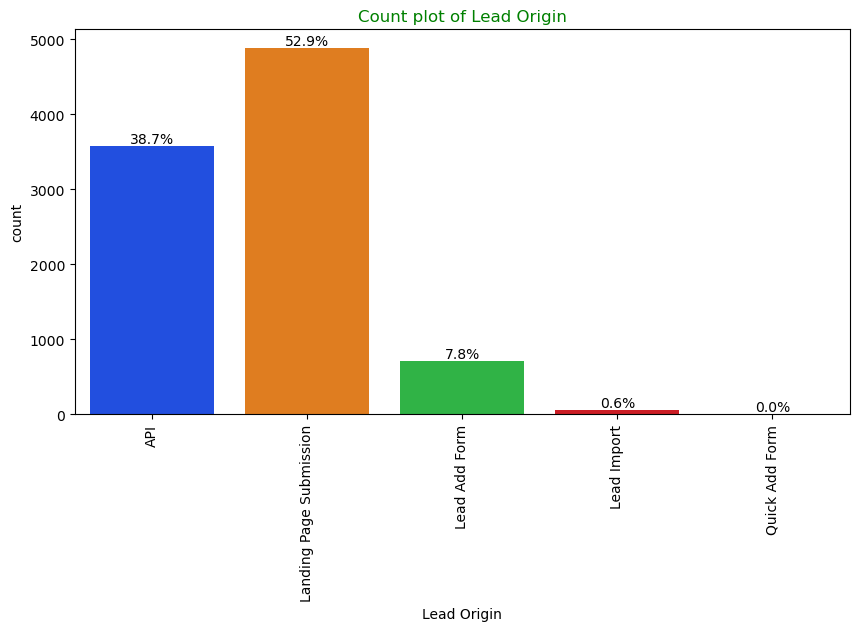

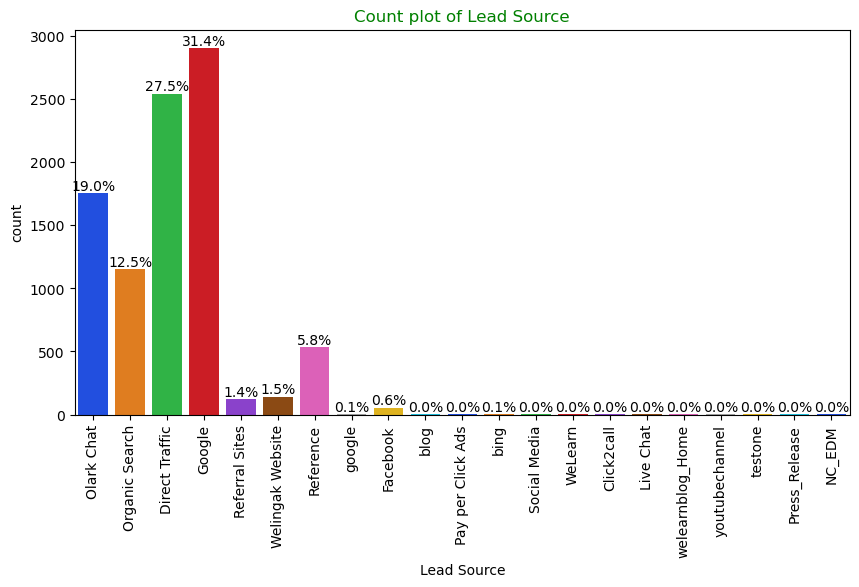

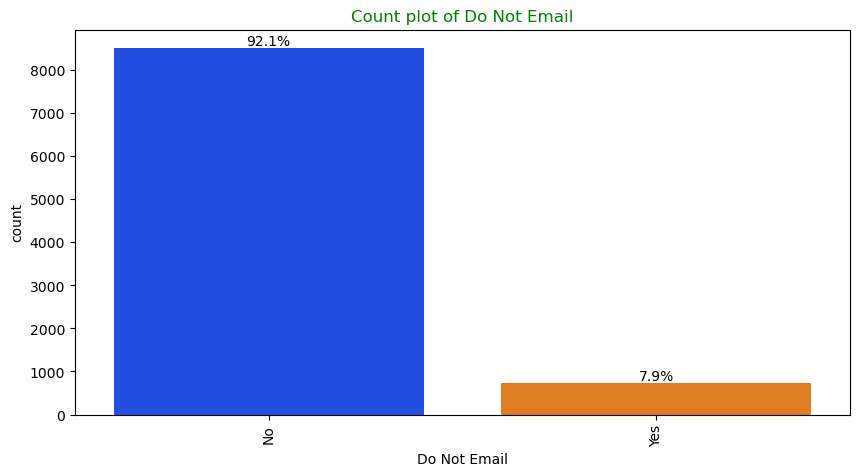

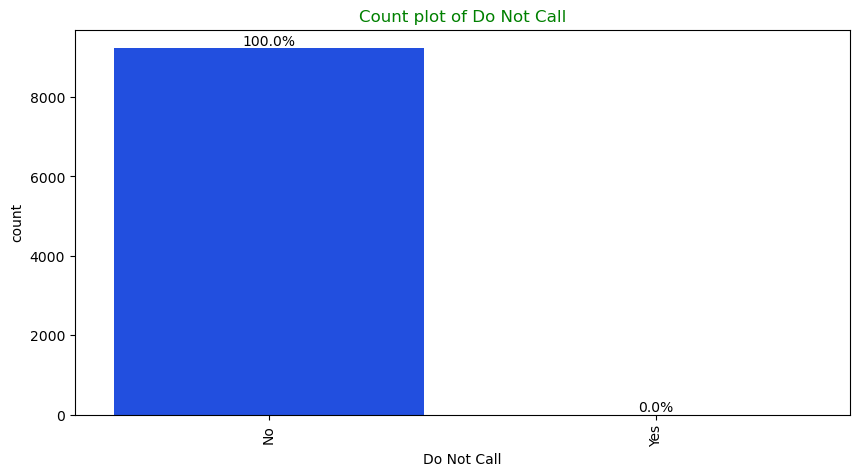

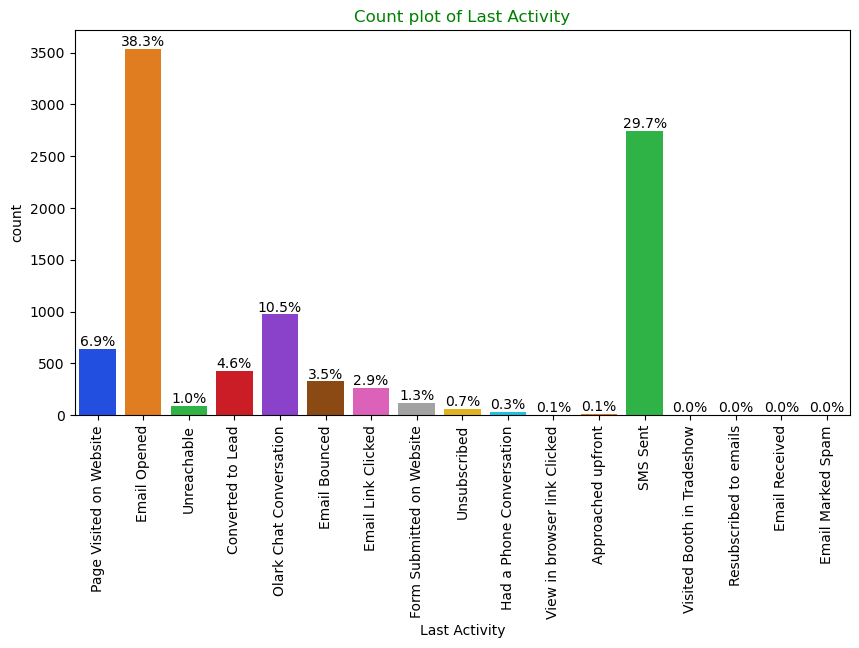

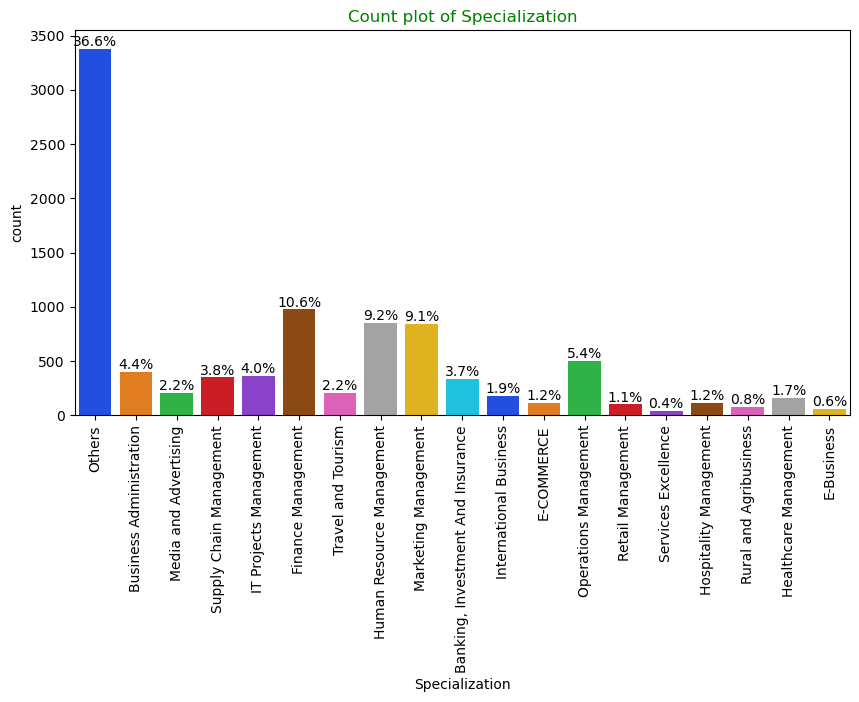

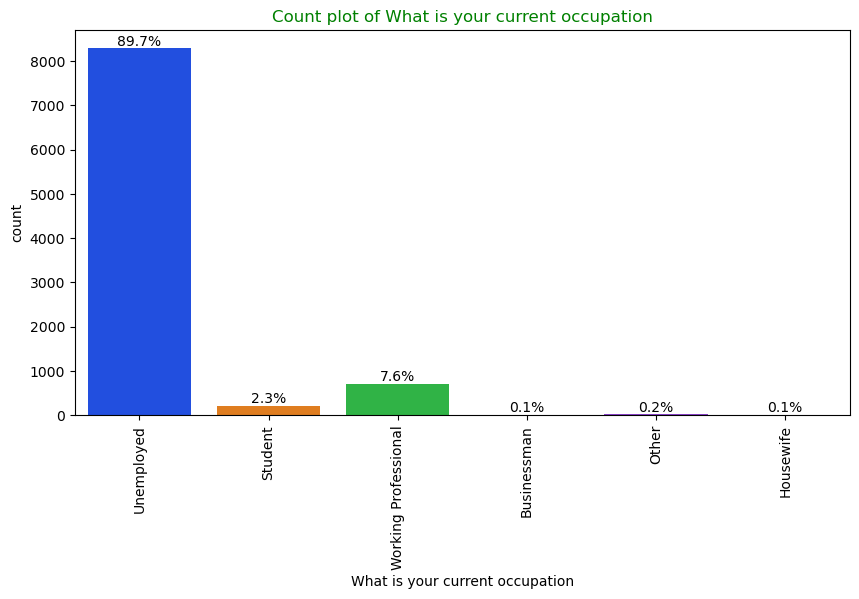

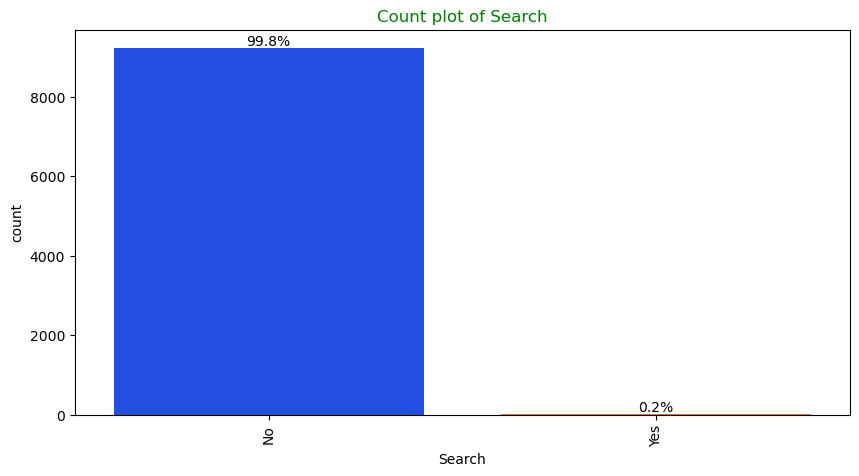

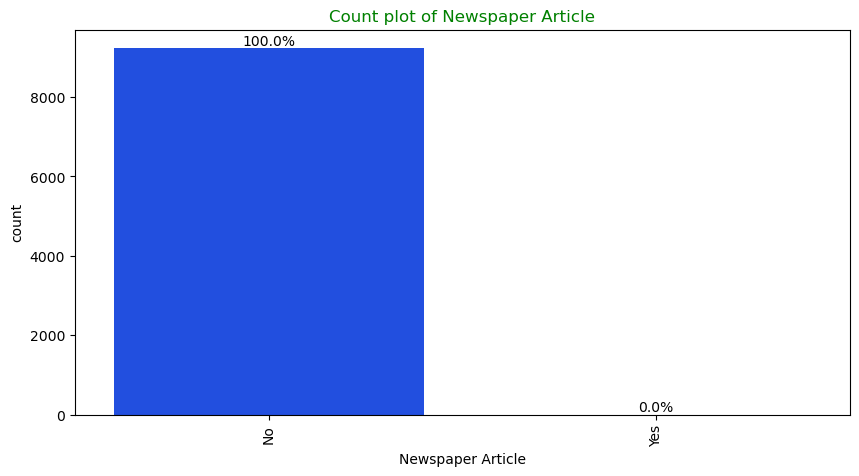

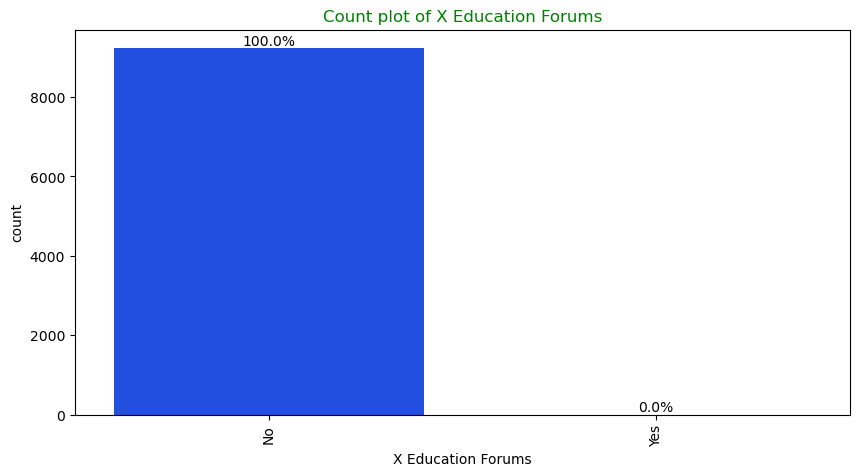

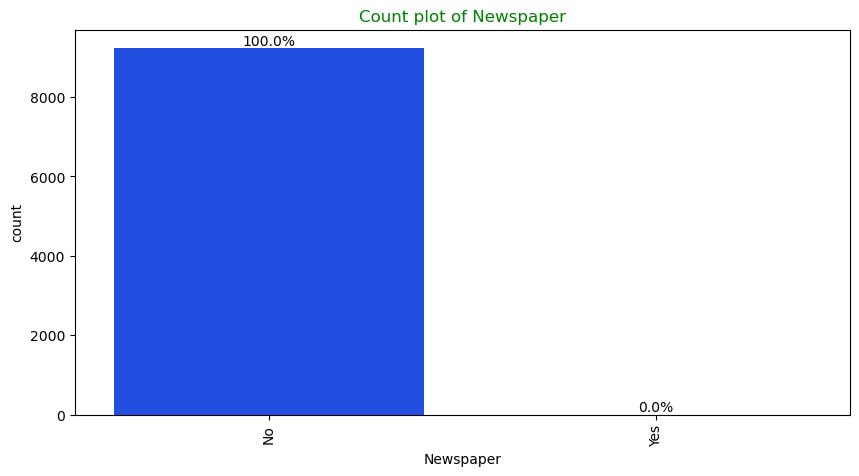

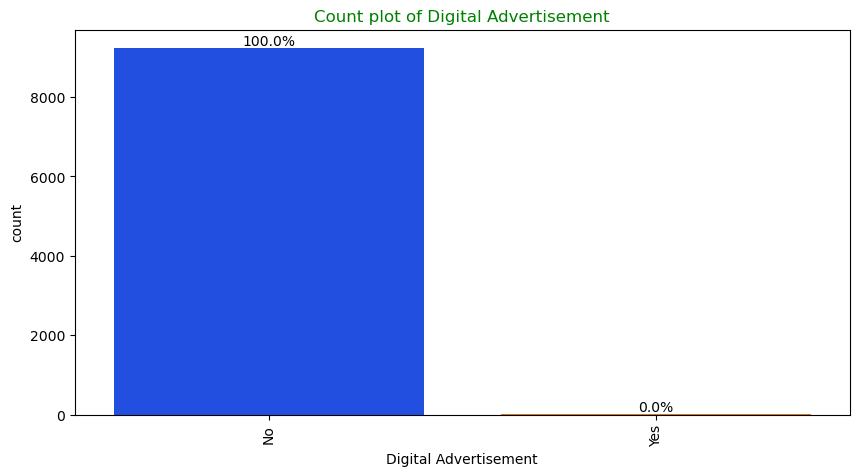

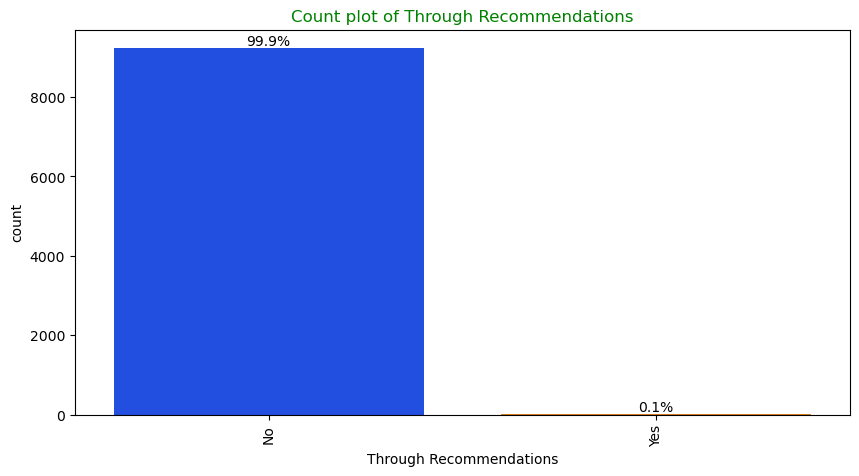

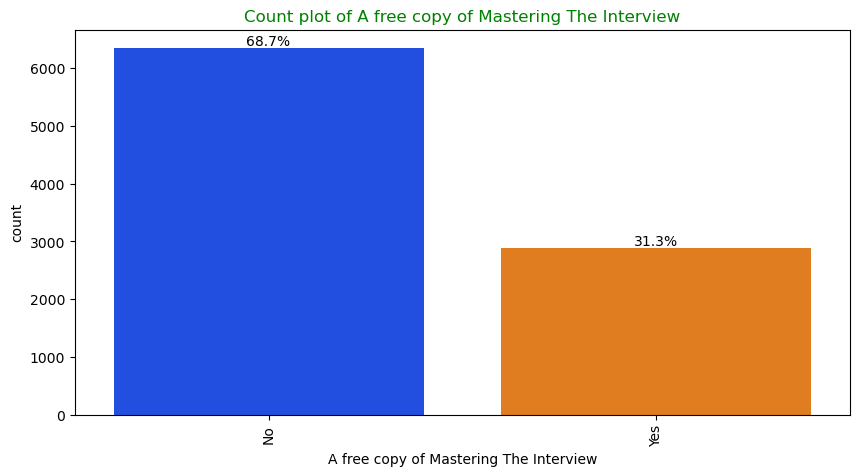

In [25]:
columnsList = leadsdf.select_dtypes(include=['category', 'object']).columns.tolist()

for column in columnsList:
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(column), color='green')
    ax = sns.countplot(x=column, data=leadsdf, palette='bright')
    total = len(leadsdf[column])
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        text = '{:.1f}%'.format(percentage)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


### Inference:

#### The following columns have highly skewed data. These variables can affect the performance of logistic regression models as they will lead towards biasness

#### 'Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'.

In [26]:
# Dropping above column as they are highly skewed data

leadsdf.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'], axis=1,inplace=True)
leadsdf.shape

(9240, 11)

## Outlier Treatment

In [27]:
#Checking for outliers in the continuous variables

num_df=leadsdf[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [28]:
# Checking outlier at 25%, 50%, 75%, 90%, 95%,99%

num_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.394156                   487.698268              2.327787
std       4.836682                   548.021466              2.164258
min       0.000000                     0.000000              0.000000
25%       0.000000                    12.000000              0.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

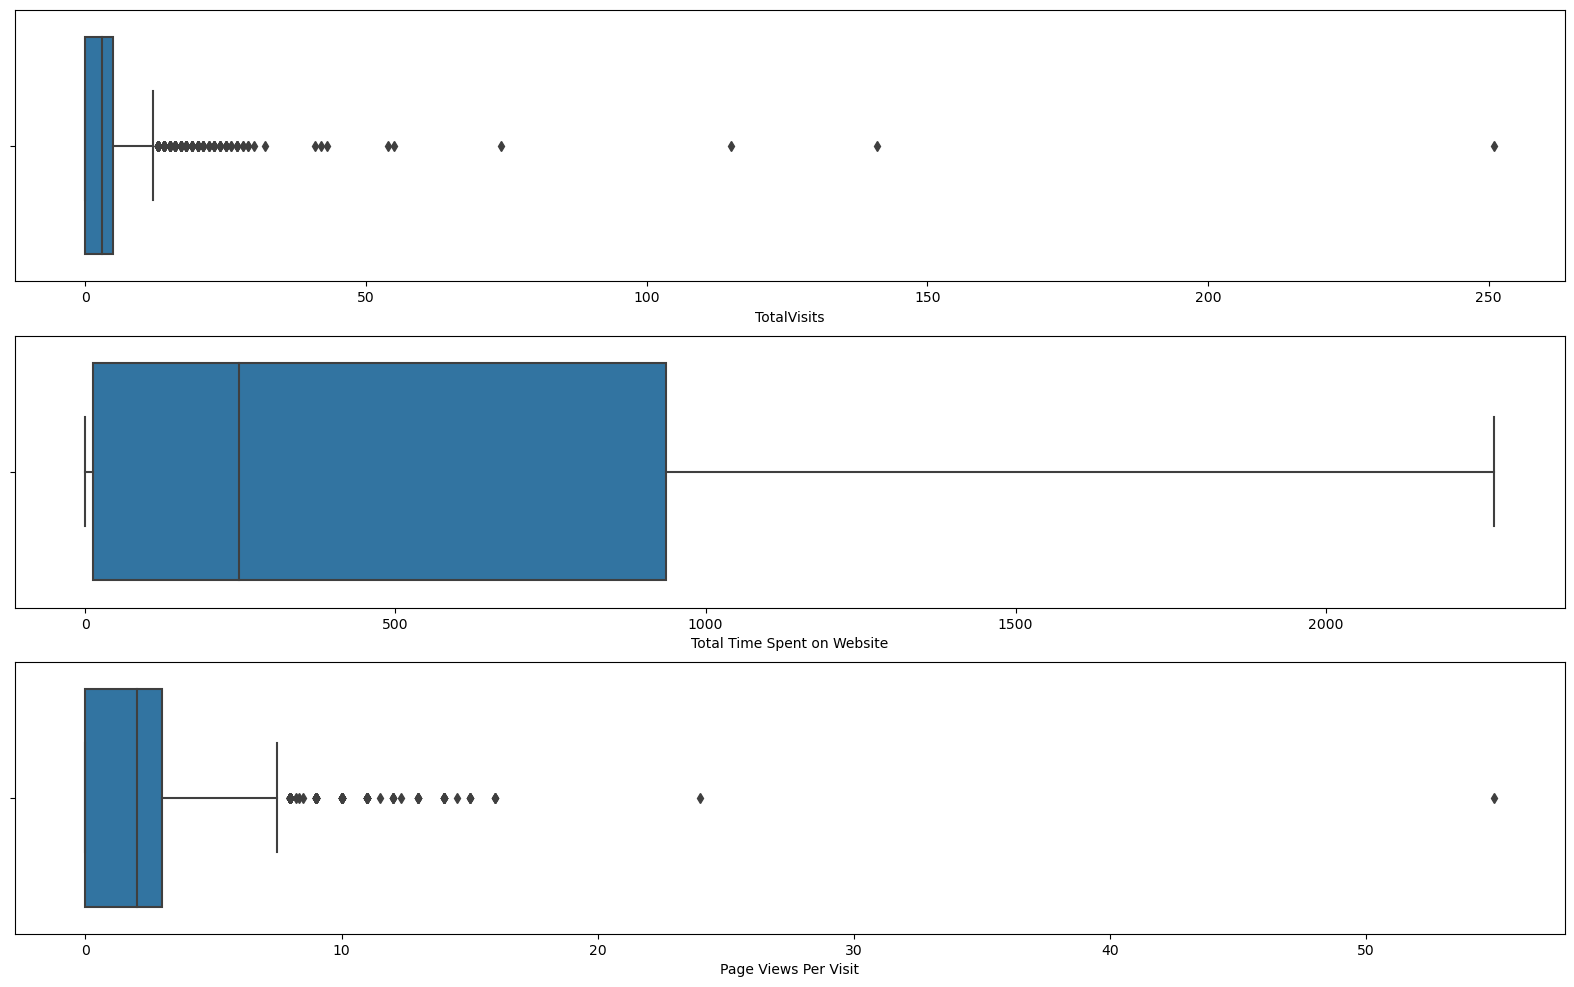

In [29]:
# PLotting boxplot for above variable

plt.figure(figsize=(20,12))
plt.subplot(3,1,1)
sns.boxplot(x='TotalVisits',y=None, data=leadsdf)
plt.subplot(3,1,2)
sns.boxplot(x='Total Time Spent on Website', y=None, data=leadsdf)
plt.subplot(3,1,3)
sns.boxplot(x='Page Views Per Visit',y=None, data=leadsdf);

### Inference: The difference between 99th percentile value and maximum value is huge. This depicts the presence of outliers.

In [30]:
# Imputing outliers in Total Visits with 99th percentile
leadsdf['TotalVisits']=leadsdf['TotalVisits'].apply(lambda x: leadsdf['TotalVisits'].describe(percentiles=[0.99])[5] if x> leadsdf['TotalVisits'].describe(percentiles=[0.99])[5] else x)

In [31]:
# Imputing outliers in Total Time Spent on Website with 99th percentile
leadsdf['Total Time Spent on Website']=leadsdf['Total Time Spent on Website'].apply(lambda x: leadsdf['Total Time Spent on Website'].describe(percentiles=[0.99])[5] if x> leadsdf['Total Time Spent on Website'].describe(percentiles=[0.99])[5] else x)

In [32]:
# Imputing outliers in Page Views Per Visit with 99th percentile
leadsdf['Page Views Per Visit']=leadsdf['Page Views Per Visit'].apply(lambda x: leadsdf['Page Views Per Visit'].describe(percentiles=[0.99])[5] if x> leadsdf['Page Views Per Visit'].describe(percentiles=[0.99])[5] else x)

In [33]:
# Checking percentile values again at 25%, 50%, 75%, 90%, 95% and 99%
num_df=leadsdf[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.283333                   486.510793              2.299396
std       3.253250                   544.845436              1.991020
min       0.000000                     0.000000              0.000000
25%       0.000000                    12.000000              0.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
99%      17.000000                  1840.372100              9.000000
max      17.000000                  1840.610000              9.000000

### Data Preparation



In [34]:
# Checking for unique categorical variables
columnsList = ["Lead Origin","Lead Source","Last Activity","Specialization"]

for i in columnsList:
        uniqueCat = leadsdf[i].value_counts(normalize=True)*100
        print("Unique Categories in",i.upper(), ":\n")
        print(uniqueCat, "\n")
    

Unique Categories in LEAD ORIGIN :

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

Unique Categories in LEAD SOURCE :

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64 

Unique Categories in

### Inference:

#### 1)Some categories in the 'Lead Score' and 'Last Activity' columns have very few records. For these variables we can create dummy variables and group them together under "Others" category.
#### 2)In 'Lead Source' column, "Google" & "google" are same, so we will standardise the case.

In [35]:
# Grouping low frequency value levels to Others
leadsdf['Lead Source'] = leadsdf['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Grouping low frequency value levels to Others 
leadsdf['Last Activity'] = leadsdf['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')
                                                    

In [36]:
# Changing google to Google
leadsdf['Lead Source'] = leadsdf['Lead Source'].replace("google","Google")

# After Data Standardization
columnsList = ["Lead Origin","Lead Source","Last Activity","Specialization"]
for i in columnsList:
        uniqueCat = 100*leadsdf[i].value_counts(normalize=True)
        print("Unique Categories in", i.upper(), ":\n")
        print(uniqueCat, "\n")
        print("==="*40, "\n")

Unique Categories in LEAD ORIGIN :

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 


Unique Categories in LEAD SOURCE :

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64 


Unique Categories in LAST ACTIVITY :

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last

In [37]:
# Renaming column 'A free copy of Mastering The Interview' to 'Free_Copy'
leadsdf.rename(columns = {'A free copy of Mastering The Interview': 'Free_Copy'}, inplace=True)

# Renaming column 'What is your current occupationA free copy of Mastering The Interview' to 'Current_Occupation'
leadsdf.rename(columns = {'What is your current occupation': 'Current_Occupation'}, inplace=True)
leadsdf.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                          0.0                   0.0   
1          5.0                        674.0                   2.5   
2          2.0                       1532.0                   2.0   
3          1.0                        305.0                   1.0   
4          2.0                       1428.0                   1.0   

             Last Activity           Specialization Current_Occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

  Free_Copy  
0        No  
1        No  
2       Yes  
3        No  
4        No

In [38]:
#Mapping binary categorical variables (yes/no to 1/0)

leadsdf['Do Not Email']=leadsdf['Do Not Email'].apply(lambda x:1 if x=="Yes" else 0)
leadsdf['Free_Copy']=leadsdf['Free_Copy'].apply(lambda x:1 if x=="Yes" else 0)
leadsdf.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                          0.0                   0.0   
1          5.0                        674.0                   2.5   
2          2.0                       1532.0                   2.0   
3          1.0                        305.0                   1.0   
4          2.0                       1428.0                   1.0   

             Last Activity           Specialization Current_Occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_Copy  
0          0  
1          0  
2          1  
3          0  
4          0

## Exploratory Data Analysis 

### 1. Univariate analysis of categorical variables

In [39]:
# List of categorical variable columns
CatVarCols = ['Lead Origin', 'Current_Occupation', 'Do Not Email',
            'Free_Copy', 'Lead Source', 'Last Activity', 'Specialization']

<Figure size 1000x2000 with 0 Axes>

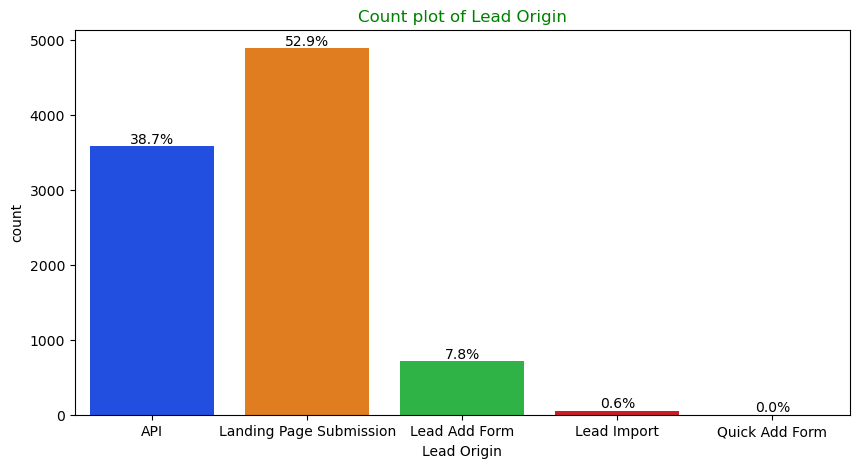

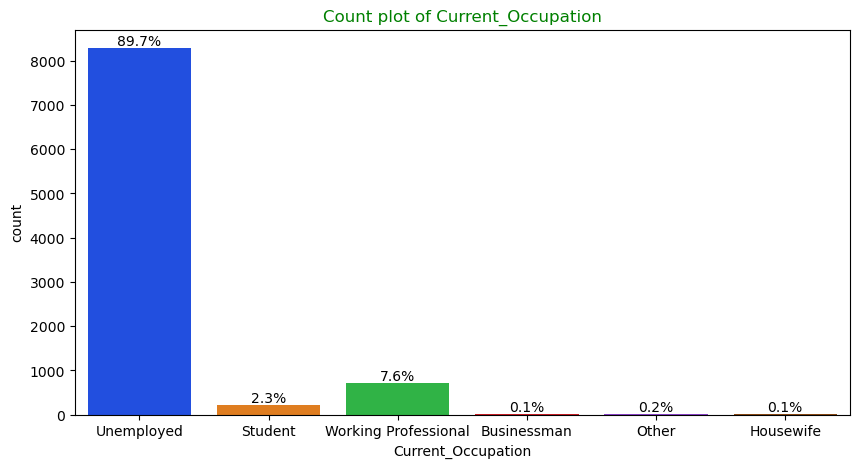

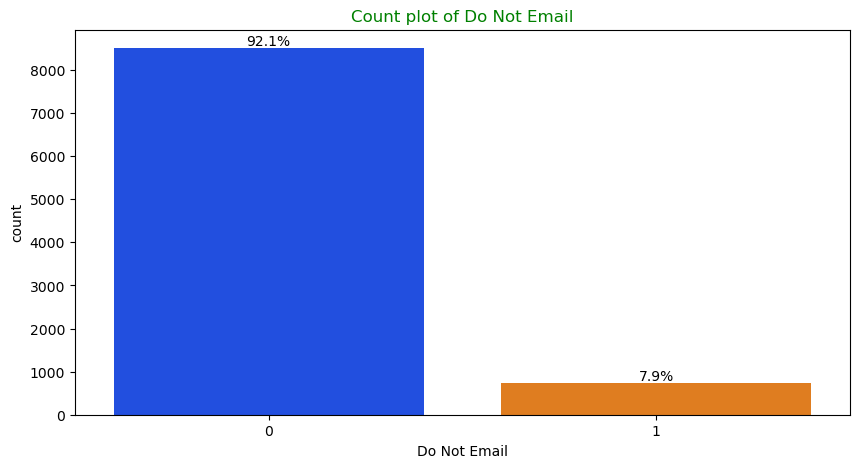

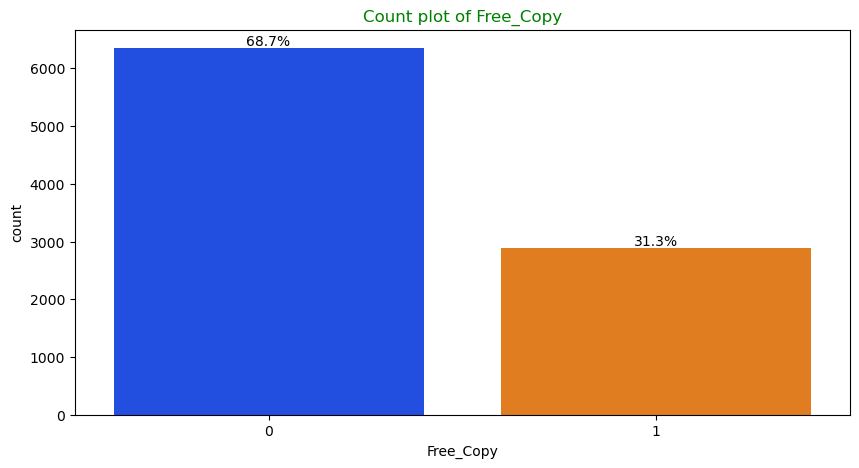

In [40]:
# Countplot of columns with short xticks
plt.figure(figsize = [10,20])
for i in CatVarCols[:4]:
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i), color='green')
    ax = sns.countplot(x=i, data=leadsdf, palette='bright')
    total = len(leadsdf[i])
    plt.xticks(rotation=0)
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


<Figure size 1000x2000 with 0 Axes>

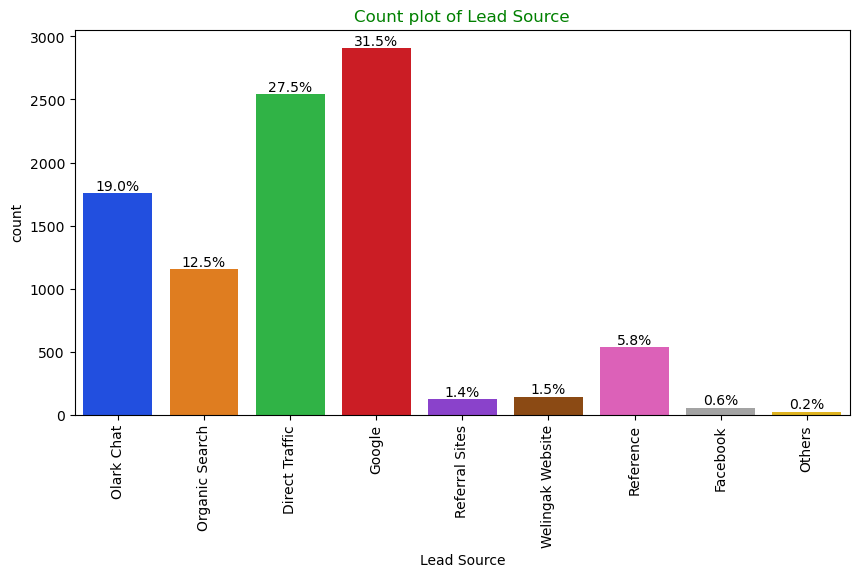

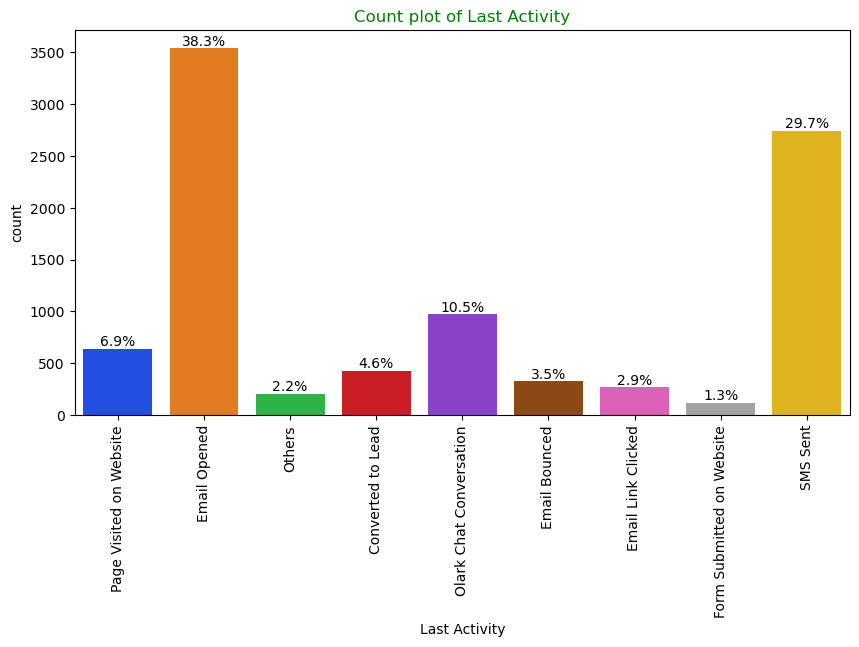

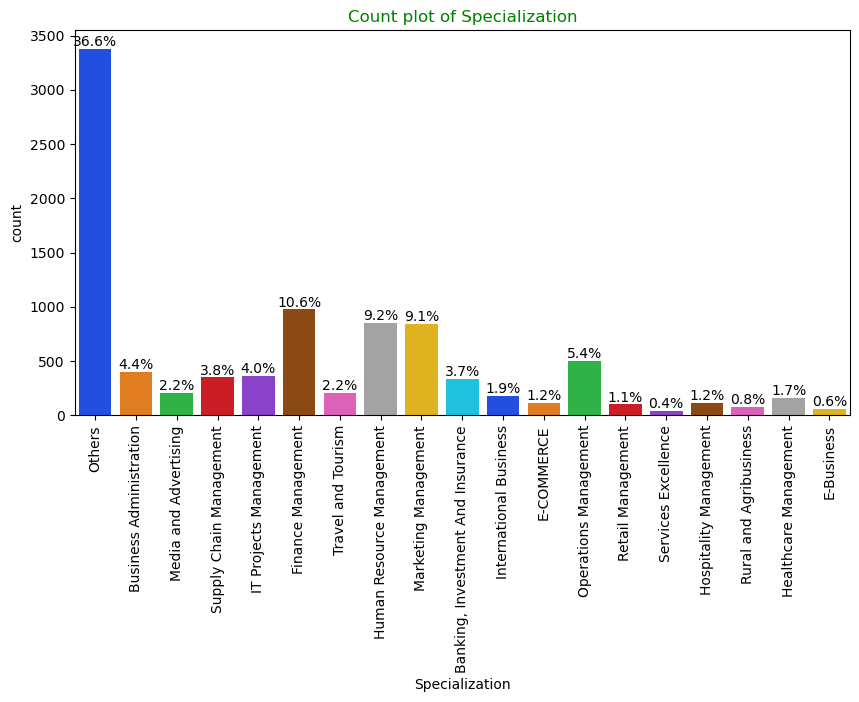

In [41]:
# Countplot of columns with long xticks
plt.figure(figsize = [10,20])
for i in CatVarCols[4:]:
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i), color='green')
    ax = sns.countplot(x=i, data=leadsdf, palette='bright')
    total = len(leadsdf[i])
    plt.xticks(rotation=90)
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points');

### Inference drawn from Univariate Analysis:
    1) Lead Origin: The majority of customers, 52.9%, were identified through 'Landing Page Submission' as the lead origin, followed by 'API' at 38.7%
    2) Current_occupation: A significant proportion of customers, 89.7%, are unemployed based on the current occupation information.
    3) Do Not Email: A large proportion of customers, 92.1%, do not want to receive emails about the course.
    4) Lead Source: The primary lead source is Google at 31.5%, followed by Direct Traffic at 27.5%.
    5) Last Activity: Email is the most common last activity, with 38.3% of customers having opened an email, and 29.7% having sent an SMS.
    6) Specialization: The 'Others' specialization category is the most common among customers at 36.6%, followed by Finance Management at 10.6%, HR Management at 9.2%, Marketing Management at 9.1%, and Operations Management at 5.4%.

### 2. Bivariate Analysis of Categorical Variables

In [42]:
# Function to do Bivariate Analysis
def BiVarAnalysis(dataframe , var_name, Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("Lead Conversion Rate of {}".format(var_name),color="red",fontsize=18)
    
    ax=sns.countplot(x=var_name, hue=Target, data=dataframe, palette="mako")
    
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(var_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


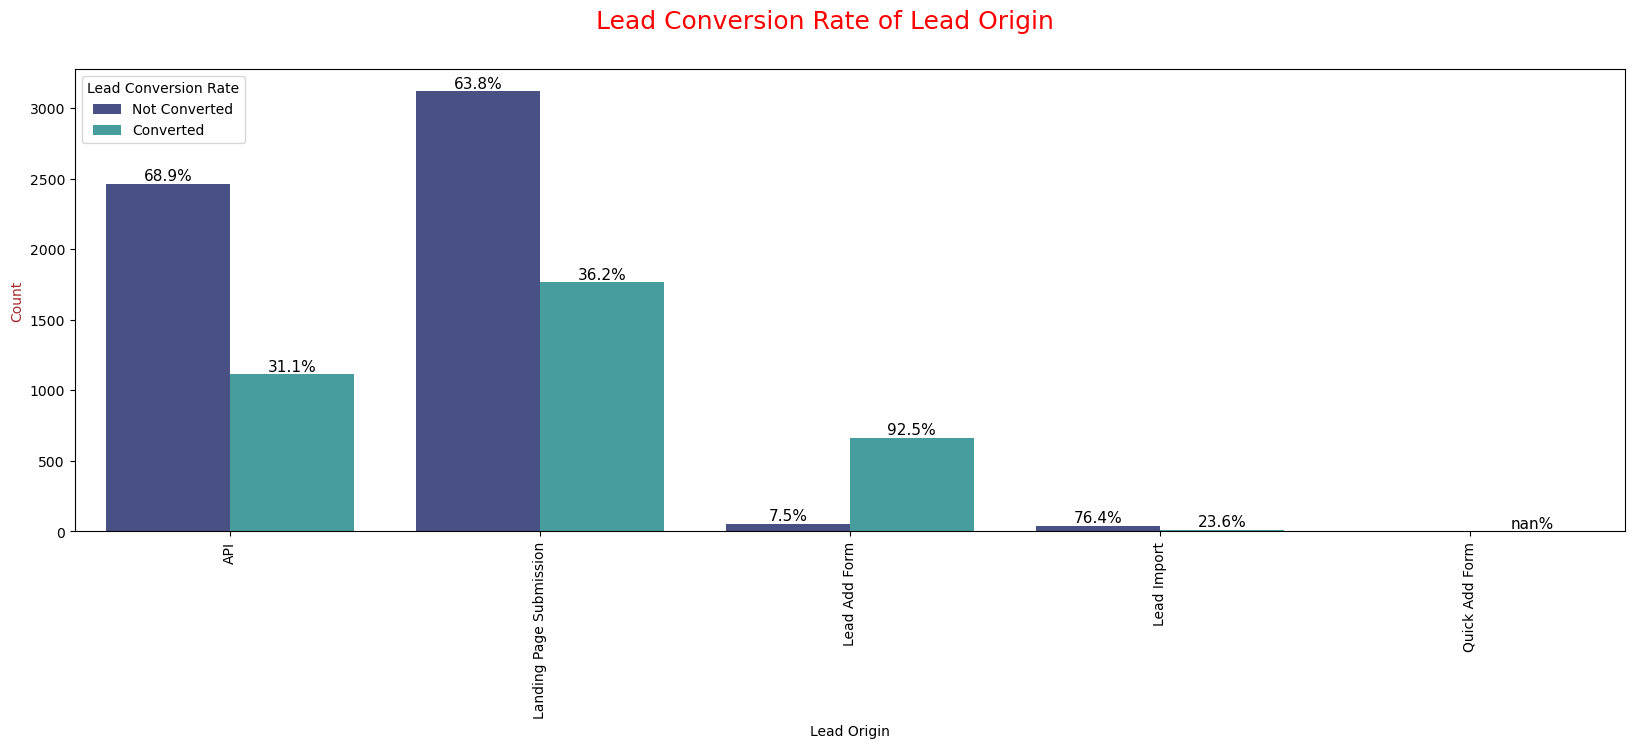

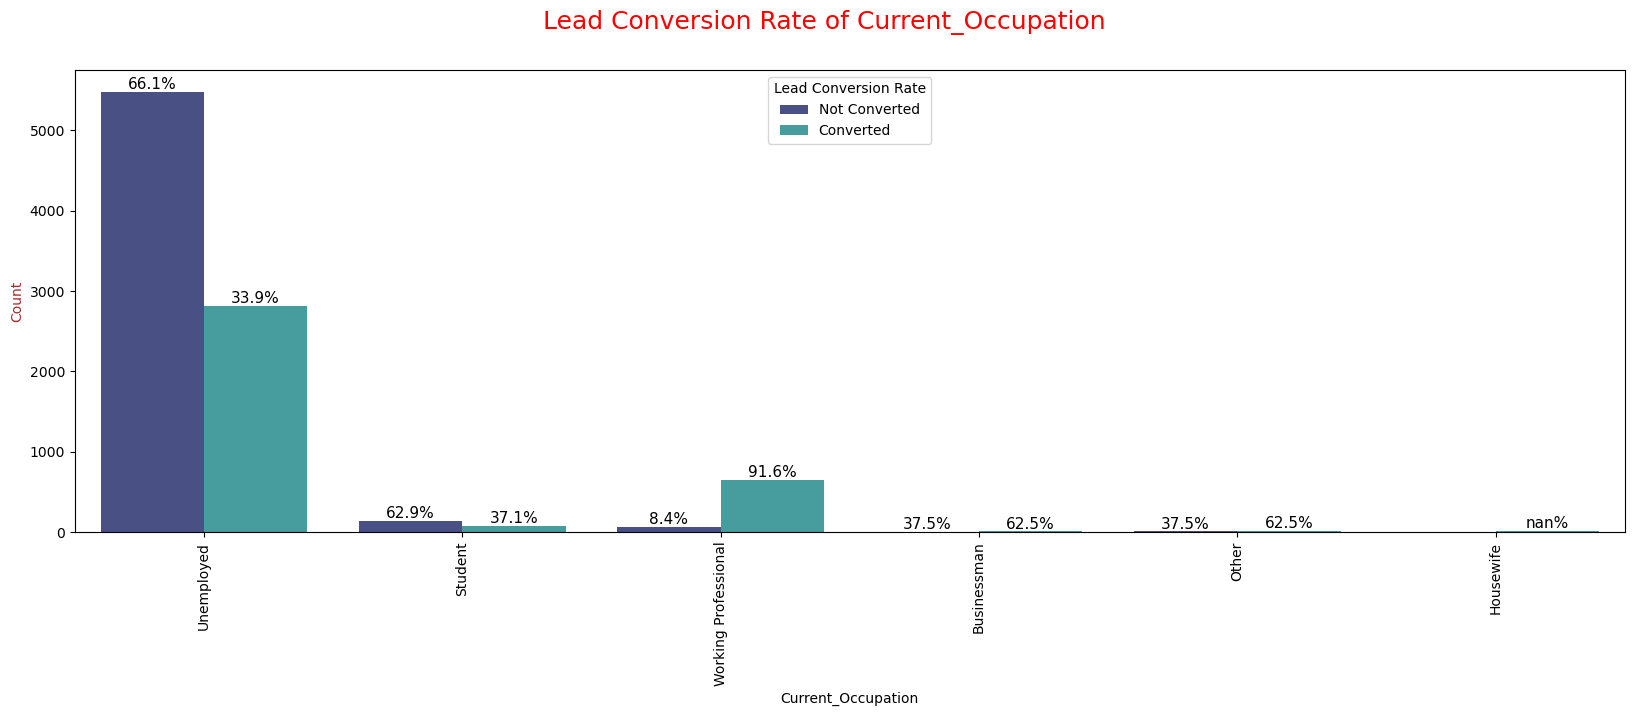

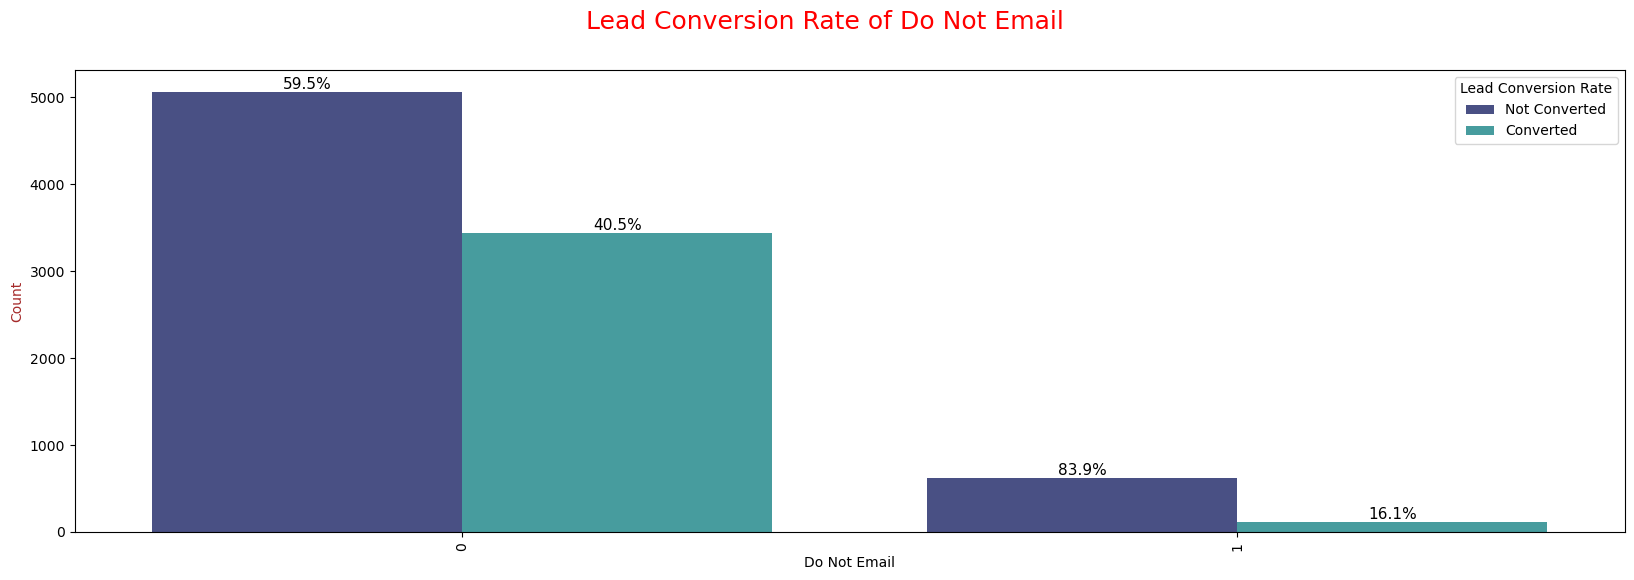

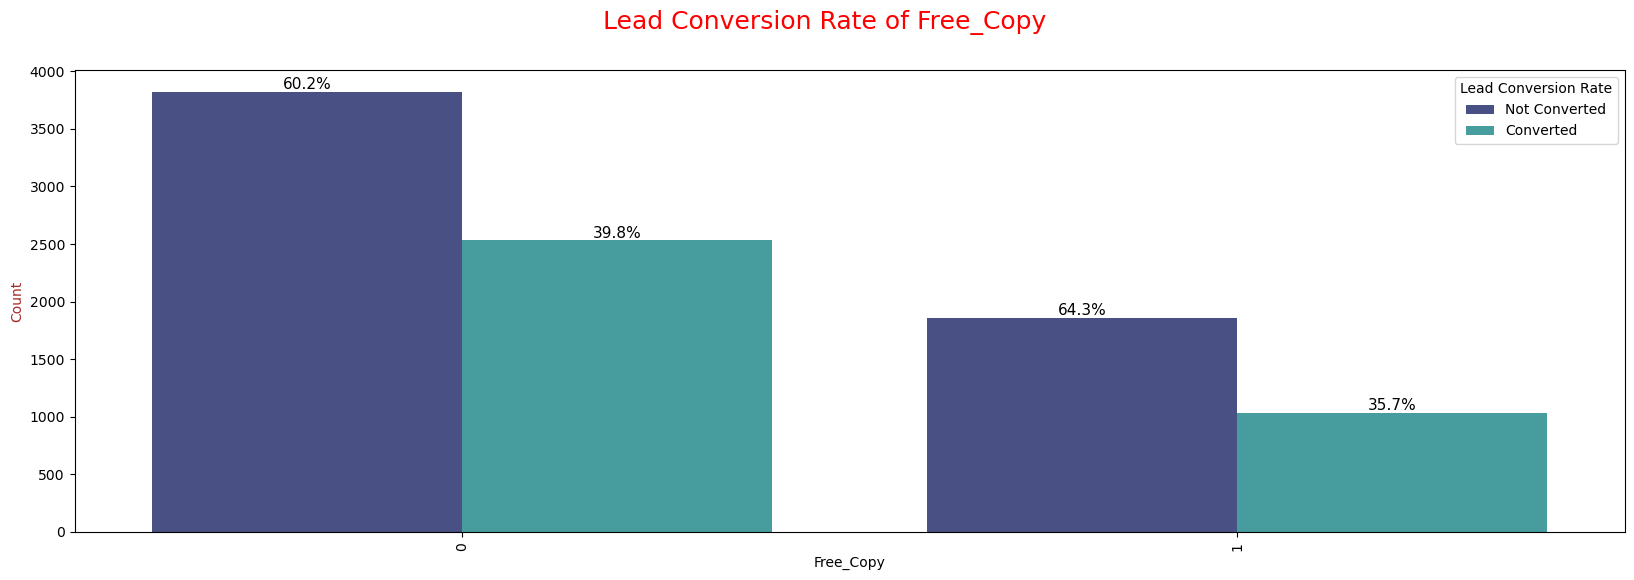

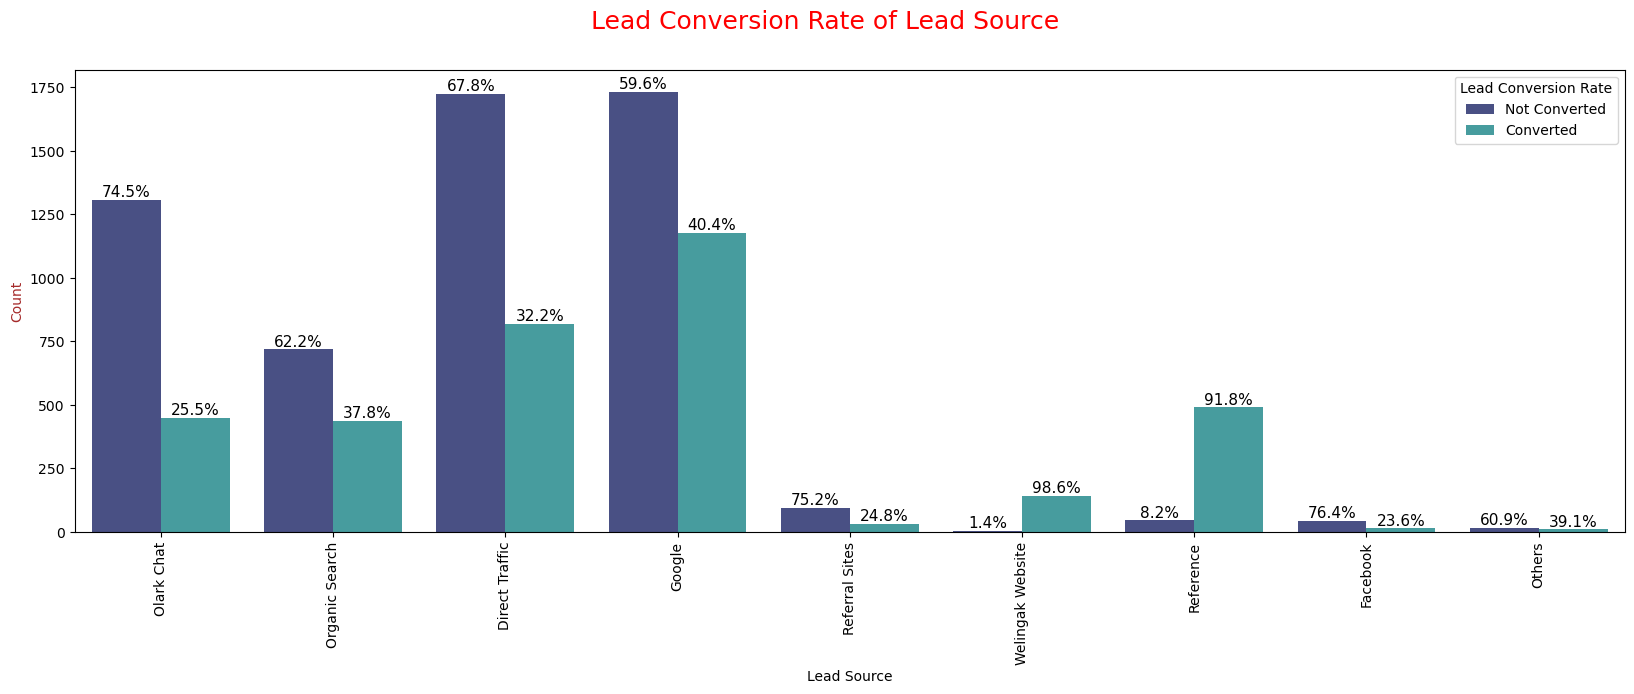

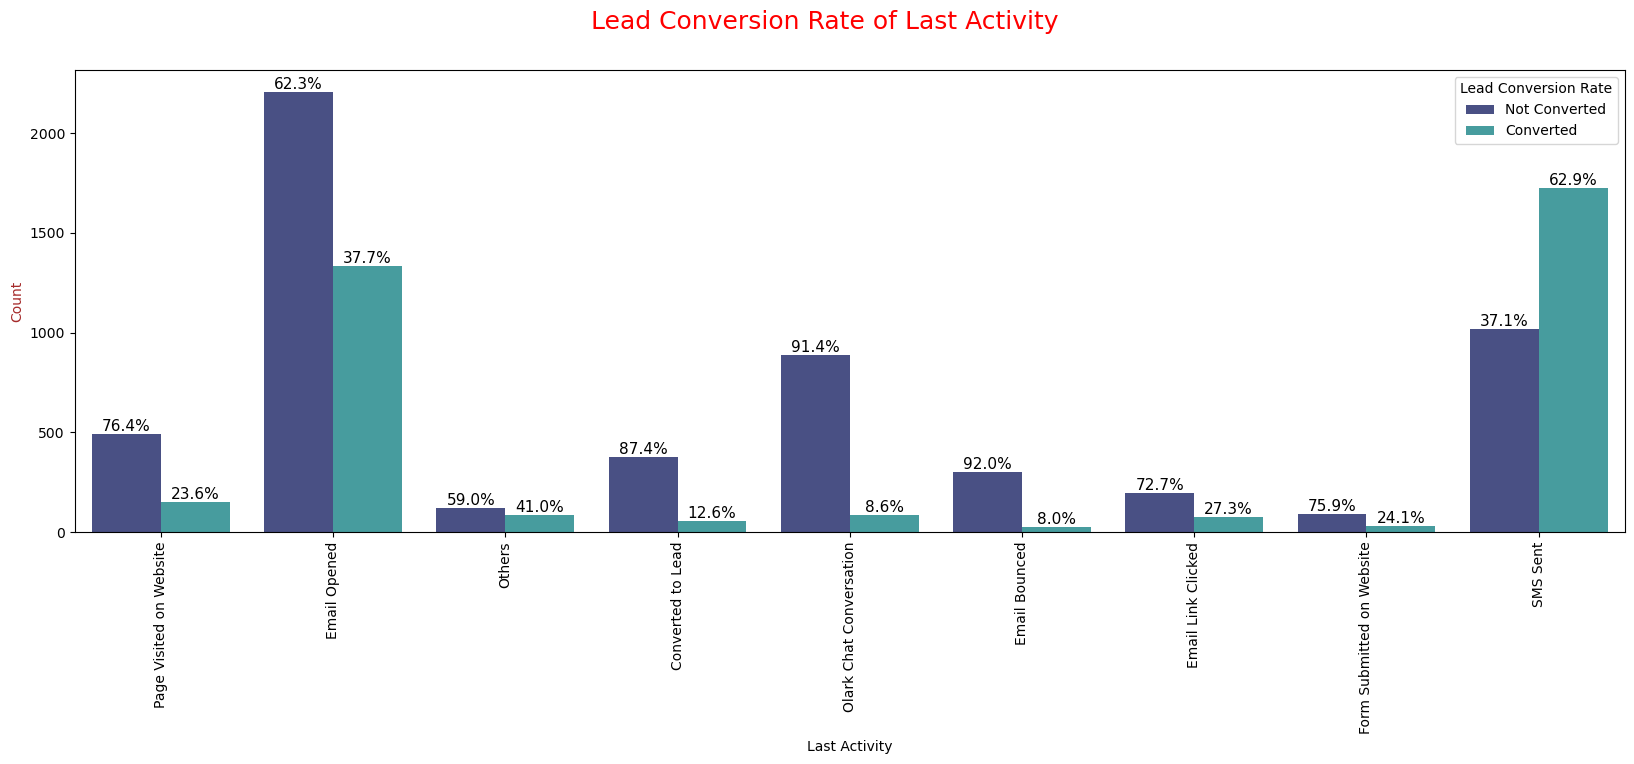

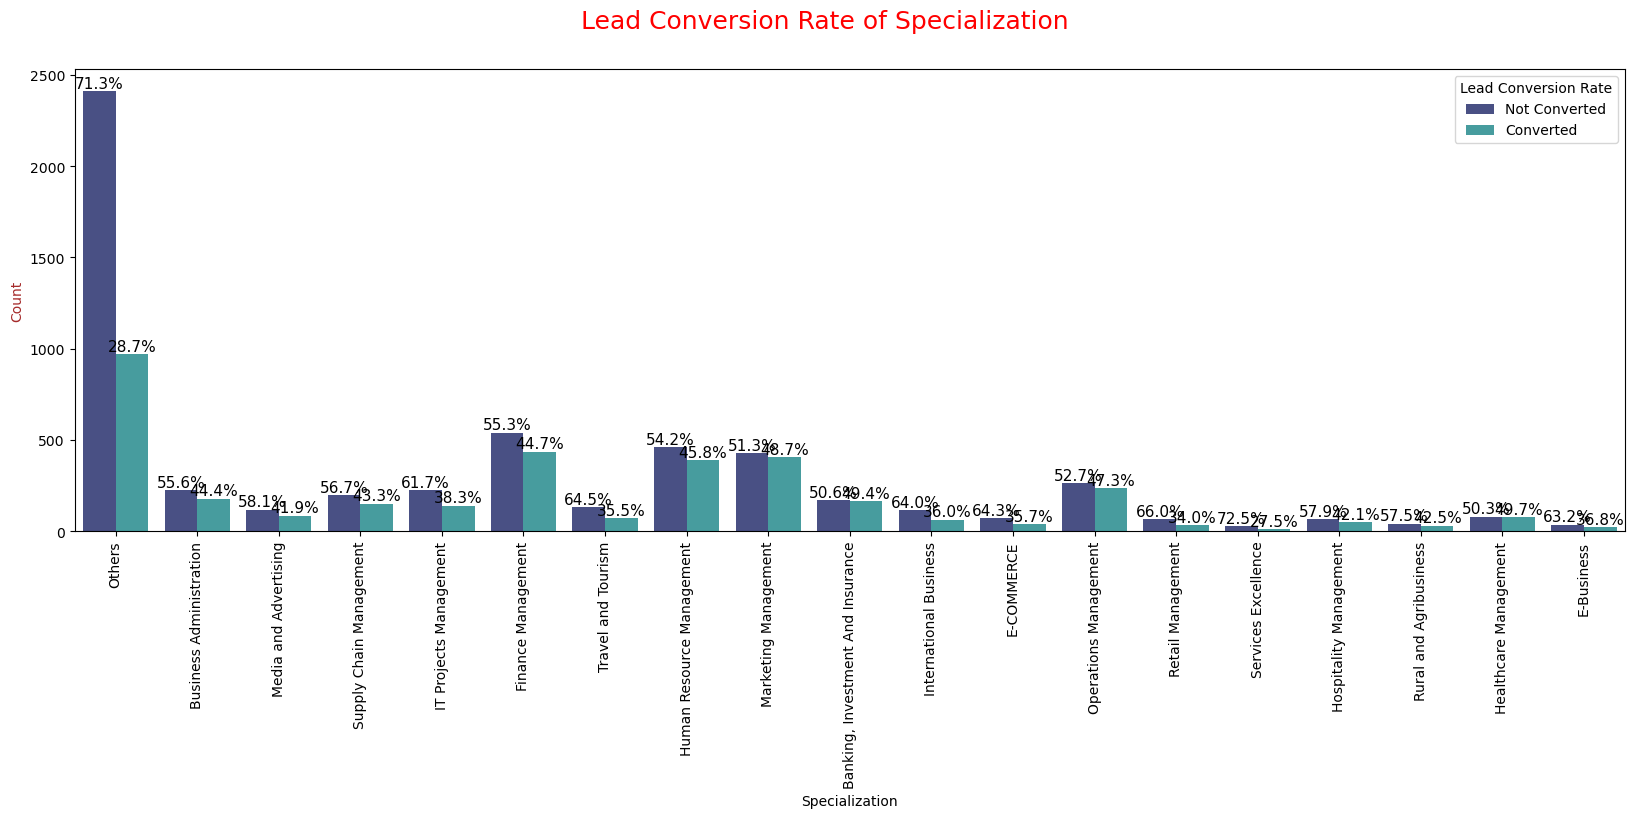

In [43]:
CatVarCols = ['Lead Origin', 'Current_Occupation', 'Do Not Email',
            'Free_Copy', 'Lead Source', 'Last Activity', 'Specialization']
#Calling Bivariate Analysis function
for i in CatVarCols:
    BiVarAnalysis(leadsdf,var_name=i)

### Inference:

##### Lead Origin: 'Landing Page Submission' is the most effective Lead Origin with a Lead Conversion Rate (LCR) of 36.2%, followed by 'API' at 31.1%.
#### Current_Occupation: Working Professionals have a significantly higher LCR at 91.6% compared to Unemployed people at 33.9%.
#### Lead Source: Google is the most effective Lead Source with an LCR of 40.4%, followed by Direct Traffic at 32.2% and Organic Search at 37.8% (contributing to only 12.5% of customers). Reference has the highest LCR at 91.8%, but there are only 5.8% of customers through this Lead Source.
#### Last Activity: SMS Sent and Email Opened are the most effective Last Activity types with LCRs of 62.9% and 37.7% respectively.
#### Specialization: Marketing Management, HR Management, Finance Management and Operations Management all show good LCRs, indicating a strong interest among customers in these specializations.

## 3. Bivariate Analysis of Numerical Variables 


<Figure size 1600x400 with 0 Axes>

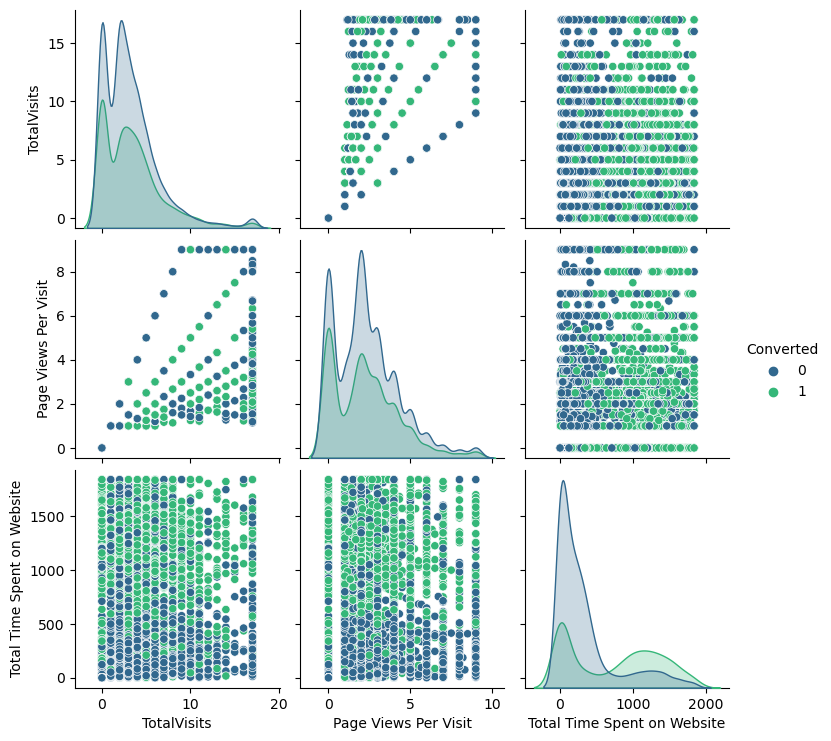

In [44]:
NumVarCols = ['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
# Pairplot of Numerical Variables
plt.figure(figsize = (16, 4))
sns.pairplot(data=leadsdf, vars=NumVarCols[1:], hue="Converted", palette="viridis")                                  
plt.show()

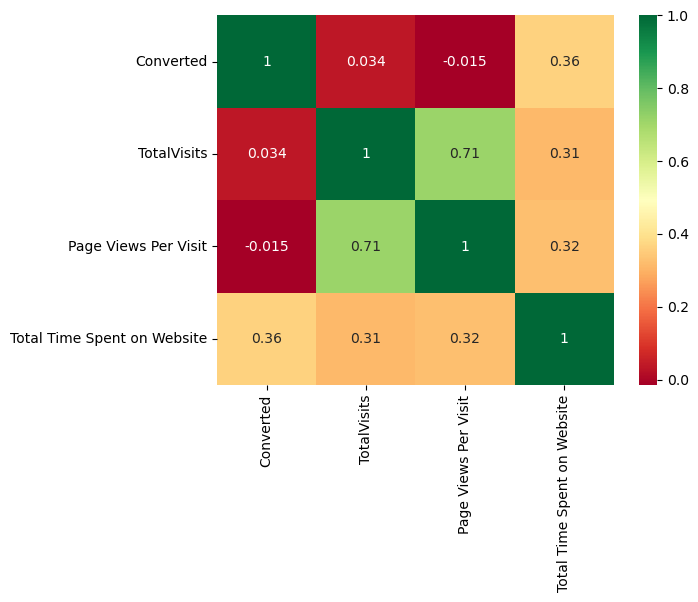

In [45]:
# Heatmap to show correlation between Numerical Variables
sns.heatmap(data=leadsdf[NumVarCols].corr(), cmap="RdYlGn", annot=True)
plt.show()

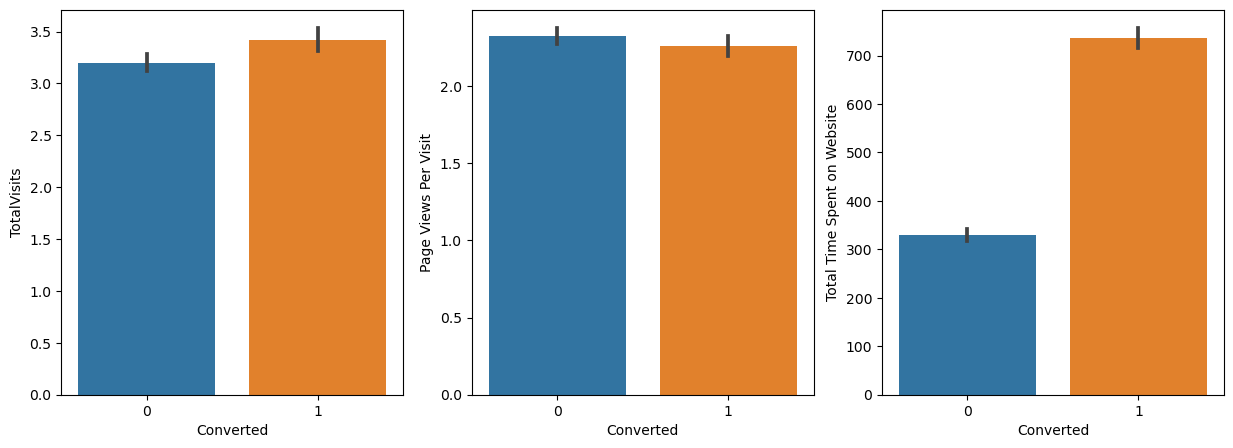

In [46]:
# Barplot with Converted as hue
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x = 'Converted', data = leadsdf)
plt.subplot(1,3,2)
sns.barplot(y = 'Page Views Per Visit', x = 'Converted', data = leadsdf)
plt.subplot(1,3,3)
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = leadsdf)
plt.show()

### Inference:

#### 1.There is a strong positive correlation between 'Total Visits' and 'Page Views per Visit', indicating that customers who visit the website more frequently tend to view more pages per visit.
#### 2.Customers who spend more time on the website have a higher LCR, indicating that increasing the time spent on the website can lead to higher conversion rates.

## Data Preparation

### 1. Creating dummy variables for categorical variables

In [47]:
leadsdf.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                          0.0                   0.0   
1          5.0                        674.0                   2.5   
2          2.0                       1532.0                   2.0   
3          1.0                        305.0                   1.0   
4          2.0                       1428.0                   1.0   

             Last Activity           Specialization Current_Occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_Copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [48]:
# Creating a dummy variable for 5 categorical variables and dropping the first one.
dummy = pd.get_dummies(leadsdf[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                 'Current_Occupation']], drop_first=True)

# Adding the results to the master dataframe
leadsdf = pd.concat([leadsdf, dummy], axis=1)
leadsdf.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                          0.0                   0.0   
1          5.0                        674.0                   2.5   
2          2.0                       1532.0                   2.0   
3          1.0                        305.0                   1.0   
4          2.0                       1428.0                   1.0   

             Last Activity           Specialization Current_Occupation  ...  \
0  Page Visited on Website                   Others         Unemployed  ...   
1             Email Opened                   Others         Unemployed  ...   
2             Email Opened  Business Administration            Student  ...   
3                   Others    Media and Advertising         Unemployed  ...   
4        Converted to Lead                   Others         Unemployed  ...   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  Current_Occupation_Housewife  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   Current_Occupation_Other  Current_Occupation_Student  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   Current_Occupation_Unemployed  Current_Occupation_Working Professional  
0                              1                                        0  
1                              1                                        0  
2                              0                                        0  
3                              1                                        0  
4                              1                                        0  

[5 rows x 54 columns]

In [49]:
# Dropping original columns after creating dummy variables

leadsdf = leadsdf.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current_Occupation'],1)
leadsdf.shape

(9240, 49)

## 2.Splitting the data into training and testing sets


In [50]:
#Importing sklearn libraries for further modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# statmodels libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [51]:
# Putting predictor variable in x 

X=leadsdf.drop('Converted', axis=1)

# Putting target variable in y

y=leadsdf['Converted']

In [52]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)



## 3. Rescaling the features 

In [53]:
# Using standard scaler for scaling the features
scaler = StandardScaler()

# Fetching int64 and float64 dtype columns from dataframe for scaling
NumVarCols = X_train.select_dtypes(include=['int64','float64']).columns

X_train[NumVarCols] = scaler.fit_transform(X_train[NumVarCols])

# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.000699                    -0.888014   
6795     -0.291638     0.217773                     0.007668   
3516     -0.291638     0.522390                    -0.693060   
8105     -0.291638     0.522390                     1.374181   
3934     -0.291638    -1.000699                    -0.888014   

      Page Views Per Visit  Free_Copy  Lead Origin_Landing Page Submission  \
1871             -1.153026  -0.673169                                    0   
6795             -0.482827   1.485511                                    1   
3516              0.106746  -0.673169                                    0   
8105              1.366519  -0.673169                                    1   
3934             -1.153026  -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
1871                           0                     0  ...   
6795                           0                     0  ...   
3516                           0                     0  ...   
8105                           0                     0  ...   
3934                           0                     0  ...   

      Specialization_Retail Management  Specialization_Rural and Agribusiness  \
1871                                 0                                      0   
6795                                 0                                      0   
3516                                 0                                      0   
8105                                 0                                      0   
3934                                 0                                      0   

      Specialization_Services Excellence  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   1   
3934                                   0   

      Specialization_Supply Chain Management  \
1871                                       0   
6795                                       0   
3516                                       0   
8105                                       0   
3934                                       0   

      Specialization_Travel and Tourism  Current_Occupation_Housewife  \
1871                                  0                             0   
6795                                  0                             0   
3516                                  0                             0   
8105                                  0                             0   
3934                                  0                             0   

      Current_Occupation_Other  Current_Occupation_Student  \
1871                         0                           0   
6795                         0                           0   
3516                         0                           0   
8105                         0                           0   
3934                         0                           0   

      Current_Occupation_Unemployed  Current_Occupation_Working Professional  
1871                              1                                        0  
6795                              1                                        0  
3516                              1                                        0  
8105                              1                                        0  
3934                              1                                        0  

[5 rows x 48 columns]

In [54]:
# Inspecting The Varibles

X_train.describe()

Do Not Email   TotalVisits  Total Time Spent on Website  \
count  6.468000e+03  6.468000e+03                 6.468000e+03   
mean   1.257360e-15  7.525074e-17                -7.870087e-17   
std    1.000077e+00  1.000077e+00                 1.000077e+00   
min   -2.916382e-01 -1.000699e+00                -8.880138e-01   
25%   -2.916382e-01 -1.000699e+00                -8.659436e-01   
50%   -2.916382e-01 -8.684527e-02                -4.355749e-01   
75%   -2.916382e-01  5.223903e-01                 8.159888e-01   
max    3.428906e+00  4.177804e+00                 2.497204e+00   

       Page Views Per Visit     Free_Copy  \
count          6.468000e+03  6.468000e+03   
mean          -1.774846e-17 -1.831490e-16   
std            1.000077e+00  1.000077e+00   
min           -1.153026e+00 -6.731691e-01   
25%           -1.153026e+00 -6.731691e-01   
50%           -1.452081e-01 -6.731691e-01   
75%            3.587010e-01  1.485511e+00   
max            3.382156e+00  1.485511e+00   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          6468.000000                6468.000000   
mean                              0.528139                   0.079468   
std                               0.499246                   0.270489   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
count              6468.000000                 6468.000000   
mean                  0.005102                    0.000155   
std                   0.071252                    0.012434   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                   1.000000                    1.000000   

       Lead Source_Facebook  ...  Specialization_Retail Management  \
count           6468.000000  ...                       6468.000000   
mean               0.005102  ...                          0.010823   
std                0.071252  ...                          0.103475   
min                0.000000  ...                          0.000000   
25%                0.000000  ...                          0.000000   
50%                0.000000  ...                          0.000000   
75%                0.000000  ...                          0.000000   
max                1.000000  ...                          1.000000   

       Specialization_Rural and Agribusiness  \
count                            6468.000000   
mean                                0.007267   
std                                 0.084940   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Specialization_Services Excellence  \
count                         6468.000000   
mean                             0.004793   
std                              0.069069   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              0.000000   
max                              1.000000   

       Specialization_Supply Chain Management  \
count                             6468.000000   
mean                                 0.037570   
std                                  0.190168   
min                                  0.000000   
25%                                  0.000000   
50%                      

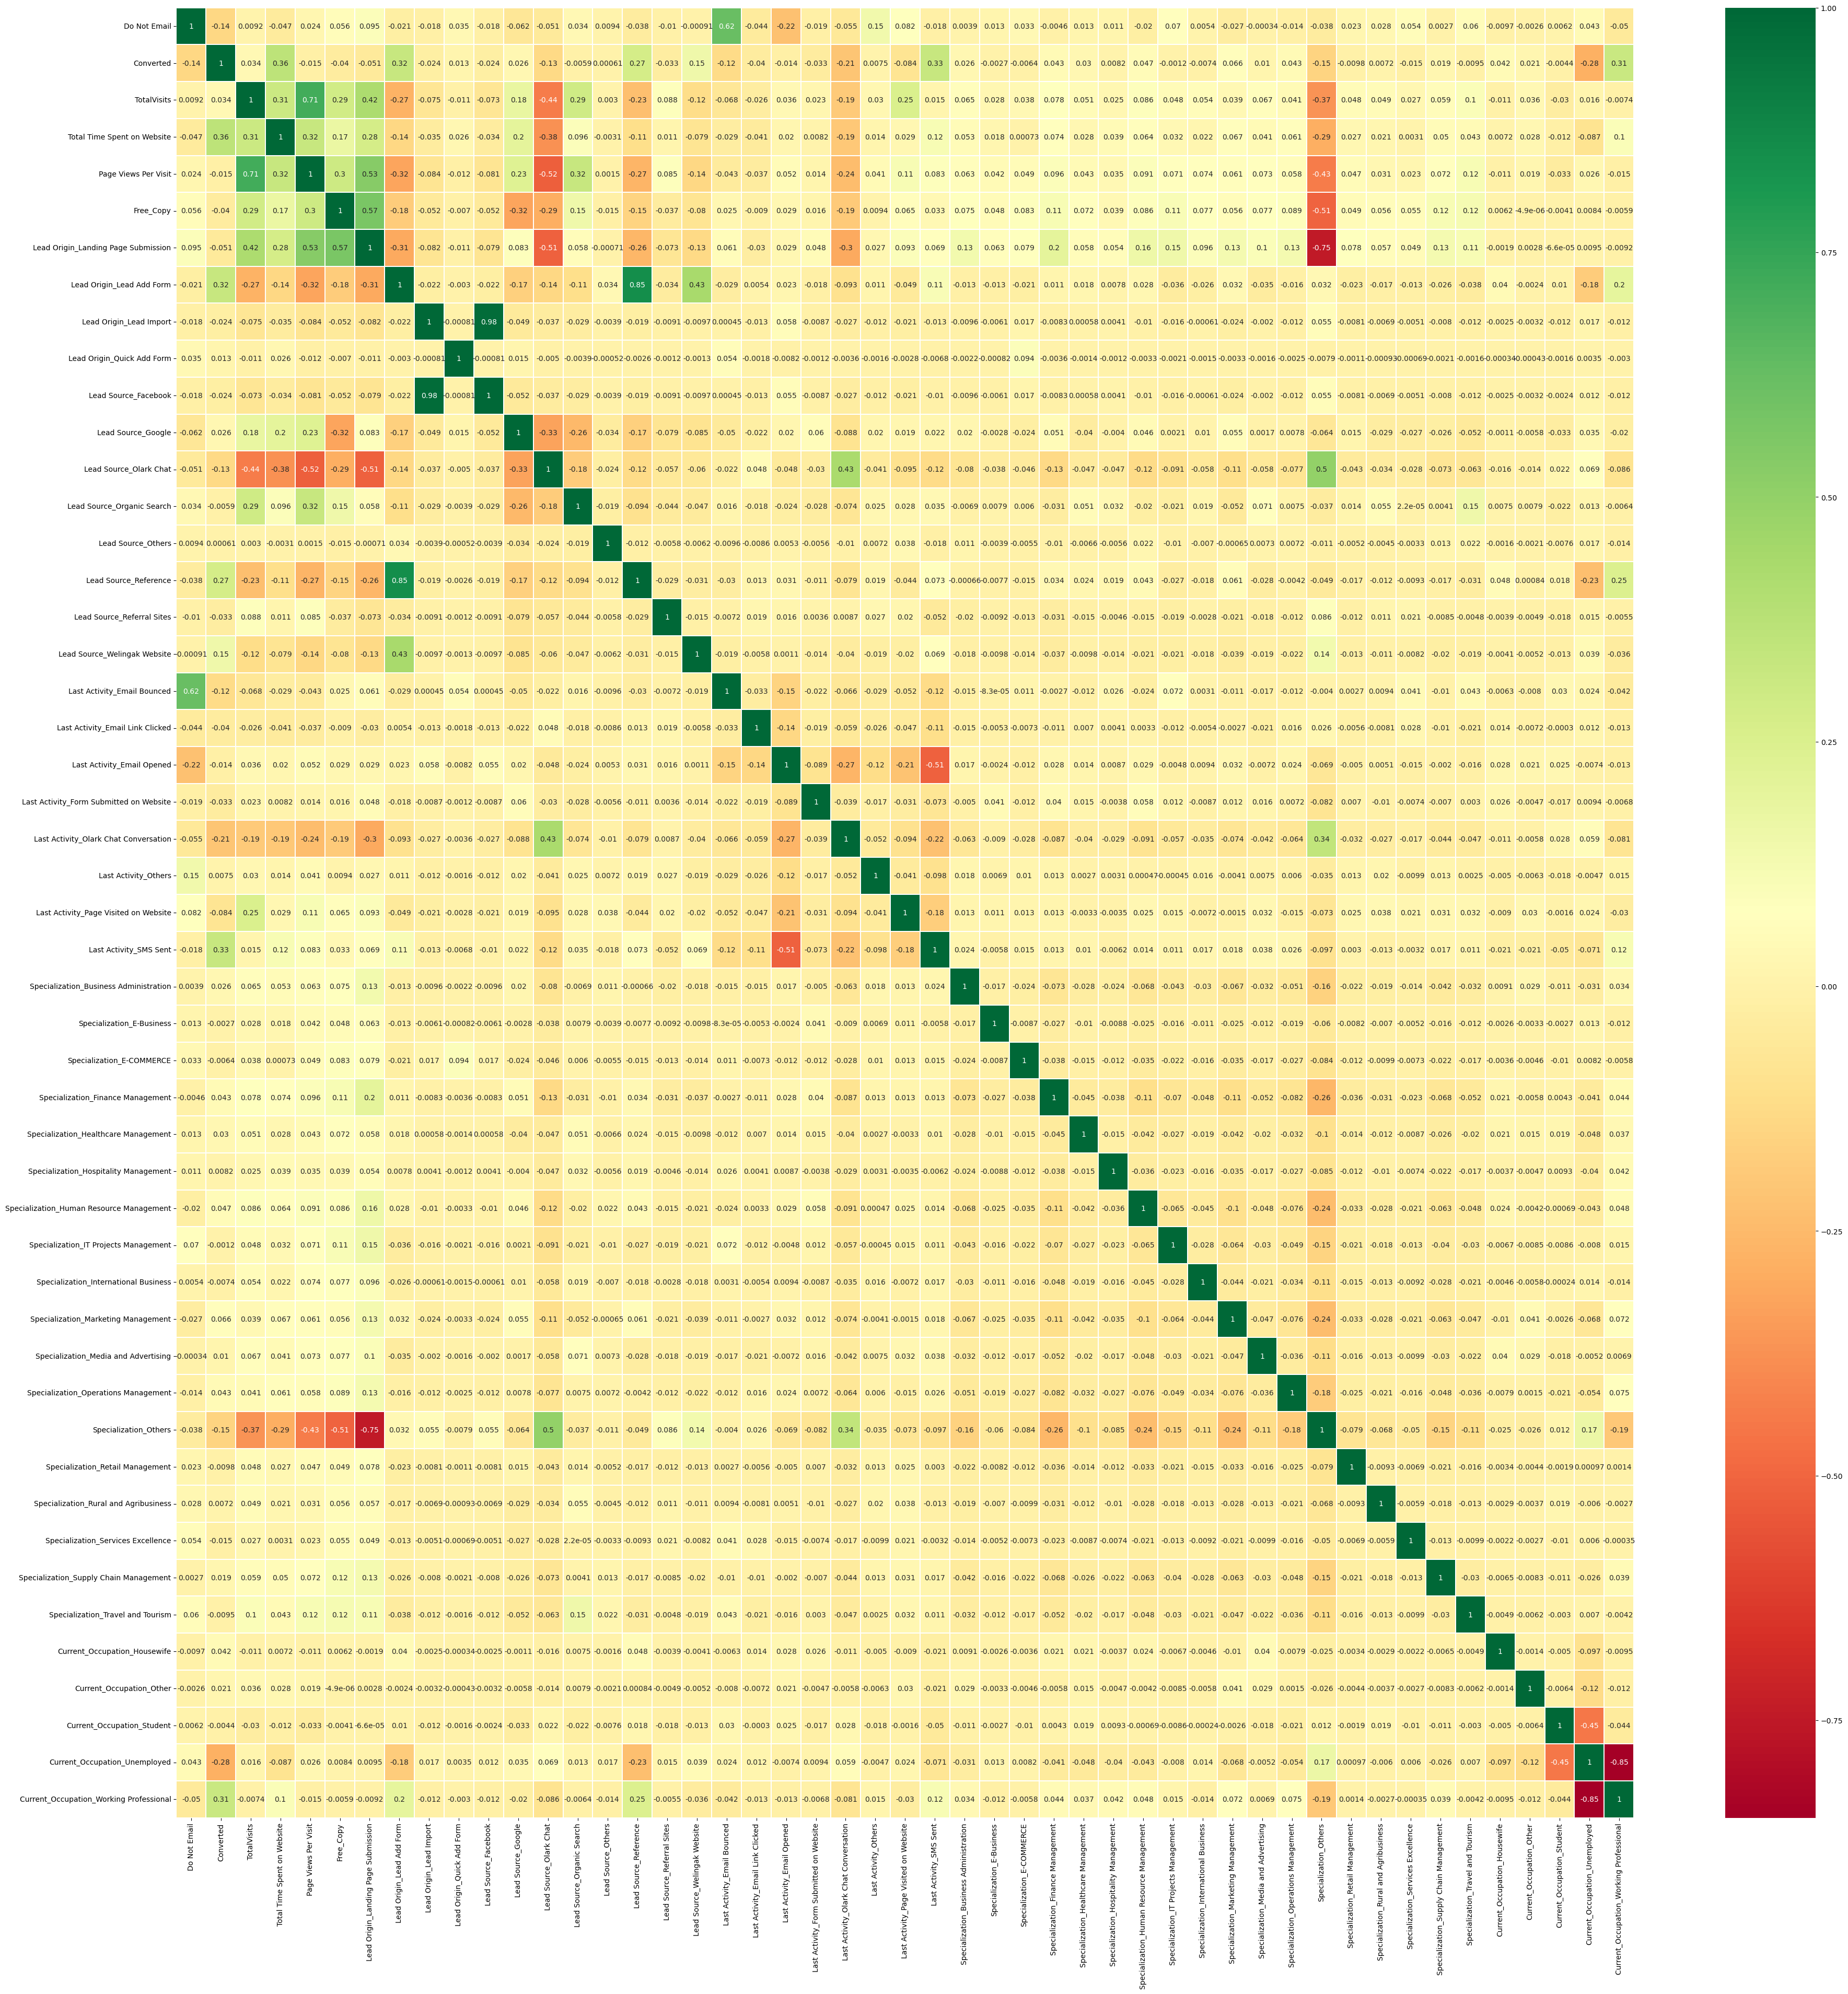

In [55]:
## 4. Looking for Correlation

plt.figure(figsize=(45,45))
sns.heatmap(leadsdf.corr(), linewidths=0.02, cmap="RdYlGn", annot=True)
plt.show()

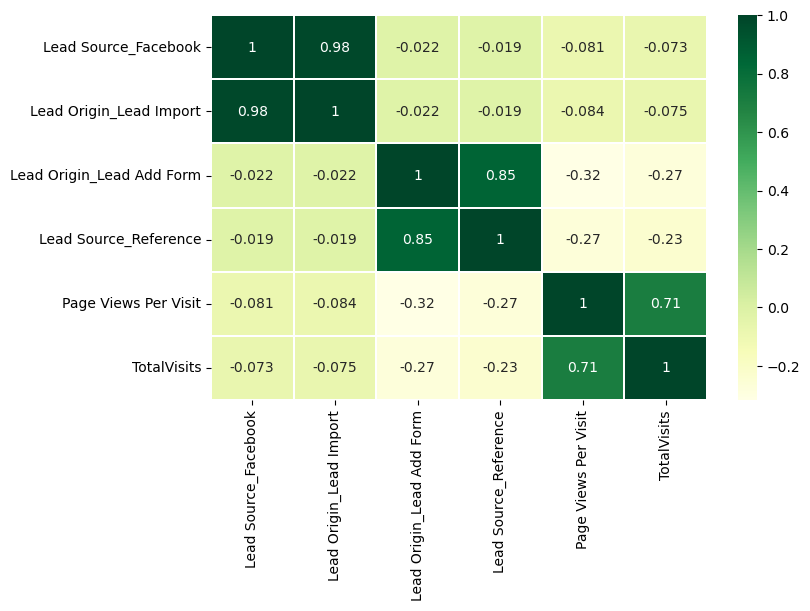

In [56]:
# Breaking Down the suspected variables which might have high correlation

plt.figure(figsize = (8,5))        
sns.heatmap(leadsdf[['Lead Source_Facebook','Lead Origin_Lead Import','Lead Origin_Lead Add Form', 'Lead Source_Reference',
                       'Page Views Per Visit', 'TotalVisits']].corr(), linewidths=0.01, cmap="YlGn", annot=True)
plt.show()

### Inference:

#### 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' exhibit high correlation with 'Lead Source_Facebook' (0.98) and 'Lead Source_Reference' (0.85) respectively, indicating that dropping one of them would not significantly impact the overall model performance.

In [57]:
# Dropping the highly correlated columns 

X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)


## Model Building

### 1. Feature selection Using RFE



In [58]:
logreg=LogisticRegression()

# Running Rfe with 15variable as output

rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train, y_train)

In [59]:
# Displaying the ranking of variables as generated by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 12),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_Copy', False, 19),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 11),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 30),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [60]:
# Displaying the columns which are selected by RFE

rfe_col=X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_Occupation_Housewife',
       'Current_Occupation_Working Professional'],
      dtype='object')

### 3. Fitting model using statsmodel

In [61]:
# Model 1

# Fitting the model and printing the model summary

X_train_rfe = X_train[rfe_col]
X_train_rfe = sm.add_constant(X_train_rfe)
logreg1=sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial())
res=logreg1.fit()
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.7
Date:                Mon, 17 Jul 2023   Deviance:                       5459.4
Time:                        17:26:37   Pearson chi2:                 8.08e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3845
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0371      0.144     -7.178      0.000      -1.320      -0.754
Total Time Spent on Website                 1.0536      0.039     27.287      0.000       0.978       1.129
Lead Origin_Landing Page Submission        -1.2730      0.127    -10.062      0.000      -1.521      -1.025
Lead Source_Facebook                       -0.6944      0.530     -1.311      0.190      -1.733       0.344
Lead Source_Olark Chat                      0.9076      0.119      7.640      0.000       0.675       1.140
Lead Source_Others                          0.9826      0.513      1.917      0.055      -0.022       1.987
Lead Source_Reference                       2.9051      0.216     13.462      0.000       2.482       3.328
Lead Source_Welingak Website                5.3880      0.729      7.395      0.000       3.960       6.816
Last Activity_Email Opened                  0.9513      0.105      9.064      0.000       0.746       1.157
Last Activity_Olark Chat Conversation      -0.5529      0.187     -2.952      0.003      -0.920      -0.186
Last Activity_Others                        1.2585      0.239      5.272      0.000       0.791       1.726
Last Activity_SMS Sent                      2.0702      0.108     19.191      0.000       1.859       2.282
Specialization_Hospitality Management      -1.0710      0.324     -3.308      0.001      -1.706      -0.436
Specialization_Others                      -1.1936      0.121     -9.835      0.000      -1.431      -0.956
Current_Occupation_Housewife               23.0242   1.32e+04      0.002      0.999   -2.59e+04     2.6e+04
Current_Occupation_Working Professional     2.6855      0.191     14.095      0.000       2.312       3.059
===========================================================================================================
"""

### Inference:

#### Removing 'Current_Occupation_Housewife' column from the model as it has higher p-value (0.99) than accepted threshold of 0.05 for statistical significance

In [62]:
# Dropping above column as stated

rfe_col=rfe_col.drop('Current_Occupation_Housewife')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_Occupation_Working Professional'],
      dtype='object')

### Model 2

In [63]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2737.3
Date:                Mon, 17 Jul 2023   Deviance:                       5474.6
Time:                        17:26:37   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0289      0.144     -7.135      0.000      -1.311      -0.746
Total Time Spent on Website                 1.0524      0.039     27.294      0.000       0.977       1.128
Lead Origin_Landing Page Submission        -1.2683      0.126    -10.032      0.000      -1.516      -1.021
Lead Source_Facebook                       -0.6953      0.529     -1.313      0.189      -1.733       0.343
Lead Source_Olark Chat                      0.9065      0.119      7.635      0.000       0.674       1.139
Lead Source_Others                          0.9758      0.512      1.904      0.057      -0.028       1.980
Lead Source_Reference                       2.9245      0.216     13.567      0.000       2.502       3.347
Lead Source_Welingak Website                5.3869      0.729      7.394      0.000       3.959       6.815
Last Activity_Email Opened                  0.9497      0.105      9.080      0.000       0.745       1.155
Last Activity_Olark Chat Conversation      -0.5578      0.187     -2.981      0.003      -0.925      -0.191
Last Activity_Others                        1.2486      0.239      5.234      0.000       0.781       1.716
Last Activity_SMS Sent                      2.0603      0.108     19.153      0.000       1.849       2.271
Specialization_Hospitality Management      -1.0785      0.324     -3.332      0.001      -1.713      -0.444
Specialization_Others                      -1.1977      0.121     -9.875      0.000      -1.435      -0.960
Current_Occupation_Working Professional     2.6774      0.190     14.059      0.000       2.304       3.051
===========================================================================================================
"""

### Inference:

#### Removing 'Lead Source_Others' column from the model as it has higher p-value (0.091) than accepted threshold of 0.05 for statistical significance.

In [64]:
# Dropping above columns as stated

rfe_col=rfe_col.drop('Lead Source_Others')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_Occupation_Working Professional'],
      dtype='object')

## Model 3

In [65]:
# Creating X_train dataframe with variables selected by RFE

X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.0
Date:                Mon, 17 Jul 2023   Deviance:                       5478.0
Time:                        17:26:37   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3827
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0117      0.144     -7.034      0.000      -1.294      -0.730
Total Time Spent on Website                 1.0504      0.039     27.266      0.000       0.975       1.126
Lead Origin_Landing Page Submission        -1.2782      0.126    -10.112      0.000      -1.526      -1.030
Lead Source_Facebook                       -0.7041      0.529     -1.330      0.183      -1.742       0.333
Lead Source_Olark Chat                      0.8966      0.119      7.562      0.000       0.664       1.129
Lead Source_Reference                       2.9124      0.215     13.519      0.000       2.490       3.335
Lead Source_Welingak Website                5.3787      0.729      7.383      0.000       3.951       6.807
Last Activity_Email Opened                  0.9485      0.105      9.075      0.000       0.744       1.153
Last Activity_Olark Chat Conversation      -0.5552      0.187     -2.971      0.003      -0.921      -0.189
Last Activity_Others                        1.2530      0.239      5.253      0.000       0.786       1.720
Last Activity_SMS Sent                      2.0567      0.107     19.136      0.000       1.846       2.267
Specialization_Hospitality Management      -1.0824      0.324     -3.346      0.001      -1.717      -0.448
Specialization_Others                      -1.2068      0.121     -9.952      0.000      -1.444      -0.969
Current_Occupation_Working Professional     2.6714      0.190     14.030      0.000       2.298       3.045
===========================================================================================================
"""

In [66]:
# Checking VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                    Specialization_Others  2.48
1       Lead Origin_Landing Page Submission  2.47
6                Last Activity_Email Opened  2.39
9                    Last Activity_SMS Sent  2.21
3                    Lead Source_Olark Chat  2.16
7     Last Activity_Olark Chat Conversation  1.72
4                     Lead Source_Reference  1.31
0               Total Time Spent on Website  1.25
12  Current_Occupation_Working Professional  1.21
5              Lead Source_Welingak Website  1.09
8                      Last Activity_Others  1.08
2                      Lead Source_Facebook  1.03
10    Specialization_Hospitality Management  1.02

In [67]:
# Dropping column 'Lead Source_Facebook' as very high vif

rfe_col=rfe_col.drop('Lead Source_Facebook')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_Occupation_Working Professional'],
      dtype='object')

### Model 4

In [68]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.0
Date:                Mon, 17 Jul 2023   Deviance:                       5480.0
Time:                        17:26:37   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0273      0.143     -7.168      0.000      -1.308      -0.746
Total Time Spent on Website                 1.0528      0.038     27.352      0.000       0.977       1.128
Lead Origin_Landing Page Submission        -1.2600      0.126    -10.040      0.000      -1.506      -1.014
Lead Source_Olark Chat                      0.9146      0.118      7.756      0.000       0.683       1.146
Lead Source_Reference                       2.9326      0.215     13.643      0.000       2.511       3.354
Lead Source_Welingak Website                5.3963      0.728      7.409      0.000       3.969       6.824
Last Activity_Email Opened                  0.9428      0.104      9.025      0.000       0.738       1.148
Last Activity_Olark Chat Conversation      -0.5551      0.187     -2.970      0.003      -0.921      -0.189
Last Activity_Others                        1.2536      0.239      5.254      0.000       0.786       1.721
Last Activity_SMS Sent                      2.0533      0.107     19.108      0.000       1.843       2.264
Specialization_Hospitality Management      -1.0934      0.323     -3.389      0.001      -1.726      -0.461
Specialization_Others                      -1.2033      0.121     -9.945      0.000      -1.440      -0.966
Current_Occupation_Working Professional     2.6697      0.190     14.025      0.000       2.297       3.043
===========================================================================================================
"""

In [69]:
# Checking VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                    Specialization_Others  2.47
1       Lead Origin_Landing Page Submission  2.45
5                Last Activity_Email Opened  2.36
8                    Last Activity_SMS Sent  2.20
2                    Lead Source_Olark Chat  2.14
6     Last Activity_Olark Chat Conversation  1.72
3                     Lead Source_Reference  1.31
0               Total Time Spent on Website  1.25
11  Current_Occupation_Working Professional  1.21
4              Lead Source_Welingak Website  1.08
7                      Last Activity_Others  1.08
9     Specialization_Hospitality Management  1.02

### Inference:

#### 1.All variables in our logistic regression model have VIF values less than 5, indicating no high multicollinearity issues.
#### 2.All variables in our logistic regression model have p-values less than 0.05, suggesting that they are statistically significant predictors of the outcome variable.
#### 3.Based on these findings, we have selected Logistic Regression Model - 4 (LRMod4) as our final model for making predictions. We will not consider any other models for further analysis, as this model has acceptable values for both VIF and p-values.

## Model Evaluation


### 1. Predicting on Train Set

In [70]:
# Getting the predicted values on the train set

y_train_pred = LRMod4.predict(X_train_sm4).values.reshape(-1)
y_train_pred[:10]

array([0.47380634, 0.07312242, 0.2491951 , 0.77080547, 0.21279386,
       0.98798199, 0.10766506, 0.99614269, 0.16975434, 0.8715092 ])

In [71]:
# Creating a data frame with the actual Converted score and Probability of conversion

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.473806         1871
1          0        0.073122         6795
2          0        0.249195         3516
3          0        0.770805         8105
4          0        0.212794         3934

In [72]:
# Mapping the prediction conversion Rate according to the probability cut off.

y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.473806         1871          0
1          0        0.073122         6795          0
2          0        0.249195         3516          0
3          0        0.770805         8105          1
4          0        0.212794         3934          0

### 2. Confusion matrix

In [73]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3588  414]
 [ 843 1623]]


In [74]:
# Calculating overall accuracy
print(100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

80.56586270871985


In [75]:
# Calculating sensitivity of our model
sensitivity=confusion[1][1]/(confusion[1][1]+confusion[1][0])
print(sensitivity*100)

65.81508515815085


In [76]:
# Calculating specificity of our model
specificity=confusion[0][0]/(confusion[0][0]+confusion[0][1])
print(specificity*100)

89.65517241379311


### 3. Plotting Roc Curve


In [77]:
# UDF to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

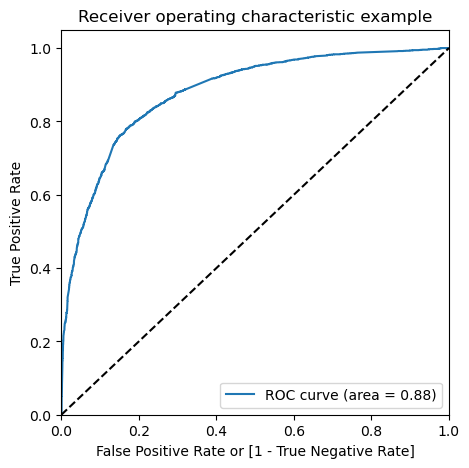

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'],
                                         drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])


### 4. Finding Optimal Cutoff Point

In [79]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.473806         1871          0    1    1    1    1    1   
1          0        0.073122         6795          0    1    0    0    0    0   
2          0        0.249195         3516          0    1    1    1    0    0   
3          0        0.770805         8105          1    1    1    1    1    1   
4          0        0.212794         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [80]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.596784  0.973236  0.364818
0.2   0.2  0.721088  0.920519  0.598201
0.3   0.3  0.791589  0.833333  0.765867
0.4   0.4  0.813853  0.764396  0.844328
0.5   0.5  0.805659  0.658151  0.896552
0.6   0.6  0.793599  0.587186  0.920790
0.7   0.7  0.779375  0.509327  0.945777
0.8   0.8  0.753711  0.403487  0.969515
0.9   0.9  0.707792  0.248175  0.991004


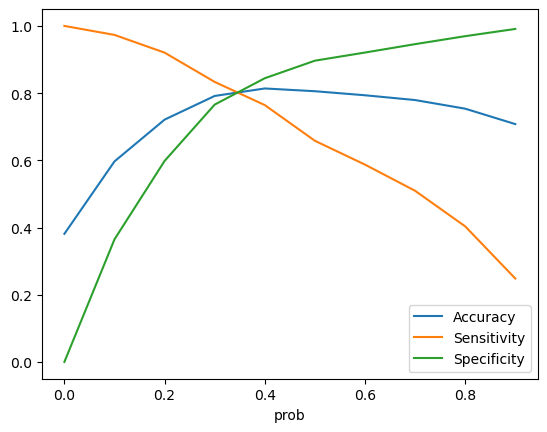

In [81]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.legend(labels=['Accuracy','Sensitivity','Specificity'])

plt.show()

### Inference:

#### It can be observed that the optimum cutoof probability is near 0.35.



In [82]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.473806         1871                1
1          0        0.073122         6795                0
2          0        0.249195         3516                0
3          0        0.770805         8105                1
4          0        0.212794         3934                0

In [83]:
# Creating the confusion matrix
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion2)

[[3246  756]
 [ 498 1968]]


In [84]:
# Calculating overall accuracy
print(100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

80.61224489795919


In [85]:
# Calculating sensitivity of our model
sensitivity=confusion2[1][1]/(confusion2[1][1]+confusion2[1][0])
print(sensitivity*100)

79.80535279805353


In [86]:
# Calculating specificity of our model
specificity=confusion2[0][0]/(confusion2[0][0]+confusion2[0][1])
print(specificity*100)

81.10944527736132


### 5. Precision & Recall Curve

In [87]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
preci, recal, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])


In [88]:
p_score = round(precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)
r_score = round(recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)

print('Precision score =', p_score)
print('Recall score    =', r_score)

Precision score = 0.7225
Recall score    = 0.7981


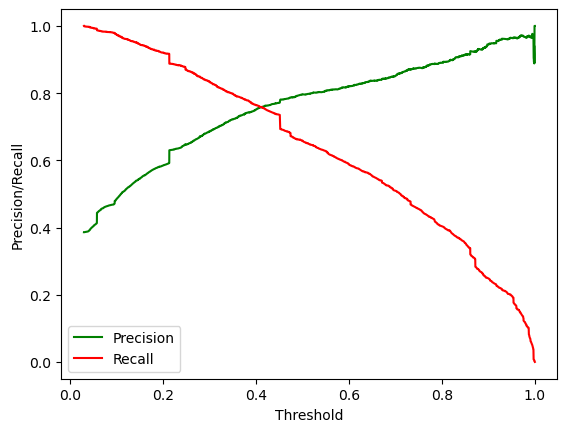

In [89]:
# Creating precision-recall tradeoff curve
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

### Inference :

#### Based on the precision-recall curve, a threshold of 0.4 provides a good balance between precision and recall


### 6. Making prediction on test set

In [90]:
NumVarCols=X_test.select_dtypes(include=['int64','float64']).columns

X_test[NumVarCols] = scaler.transform(X_test[NumVarCols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.971400                                    0   
2376                    -0.888014                                    0   
7766                    -0.779502                                    0   
9199                    -0.888014                                    0   
4359                    -0.888014                                    0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                       0                      0   
2376                       0                      1   
7766                       0                      0   
9199                       1                      0   
4359                       0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Current_Occupation_Working Professional  
4269                      1                                        0  
2376                      1                                        0  
7766                      0                                        1  
9199                      1                                        0  
4359                      0                                        0

In [91]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

# Making prediction using Logistic Regression Model - 4
y_test_pred = LRMod4.predict(X_test_sm)

# Top 10 columns
y_test_pred[:10]

4269    0.699619
2376    0.860612
7766    0.888477
9199    0.056999
4359    0.871373
9186    0.504045
1631    0.421199
8963    0.153974
8007    0.072018
5324    0.297535
dtype: float64

In [92]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.699619
2376  0.860612
7766  0.888477
9199  0.056999
4359  0.871373

In [93]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [94]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.699619
1          1         2376  0.860612
2          1         7766  0.888477
3          0         9199  0.056999
4          1         4359  0.871373

In [95]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.699619
1         2376          1        0.860612
2         7766          1        0.888477
3         9199          0        0.056999
4         4359          1        0.871373

In [96]:
# Taking sensitivity-specificity method at 0.35 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.699619                1
1         2376          1        0.860612                1
2         7766          1        0.888477                1
3         9199          0        0.056999                0
4         4359          1        0.871373                1

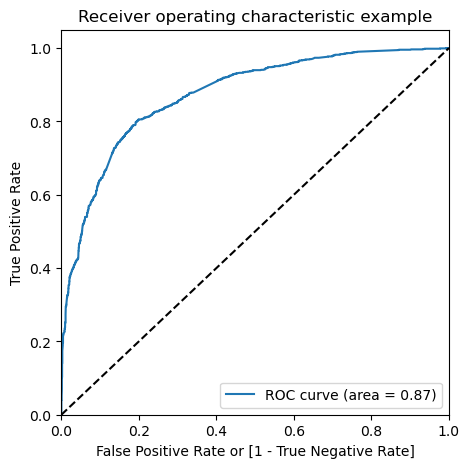

In [97]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])


In [98]:
# Creating the confusion matrix
confusion3=metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
print(confusion3)

[[1358  319]
 [ 230  865]]


In [99]:
# Calculating overall accuracy with the test set
print(100*metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

80.1948051948052


In [100]:
# Calculating sensitivity with the test set
sensitivity=confusion3[1][1]/(confusion3[1][1]+confusion3[1][0])
print(sensitivity*100)

78.99543378995433


In [101]:
# Calculating specificity with the test set
specificity=confusion3[0][0]/(confusion3[0][0]+confusion3[0][1])
print(specificity*100)

80.97793679189029


### Adding Leadscore to test dataframe

In [102]:
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head(10)

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.699619                1          70
1         2376          1        0.860612                1          86
2         7766          1        0.888477                1          89
3         9199          0        0.056999                0           6
4         4359          1        0.871373                1          87
5         9186          1        0.504045                1          50
6         1631          1        0.421199                1          42
7         8963          1        0.153974                0          15
8         8007          0        0.072018                0           7
9         5324          1        0.297535                0          30

In [103]:
y_pred_final.sort_values(by='Lead_Score', ascending=False)

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
603          6243          1        0.996760                1         100
1239         2489          1        0.996220                1         100
1976         4775          1        0.996643                1         100
196          5793          1        0.996643                1         100
416          2804          1        0.996643                1         100
...           ...        ...             ...              ...         ...
1029         5993          0        0.013966                0           1
597          3682          0        0.013650                0           1
2443         9173          0        0.013088                0           1
104           155          0        0.013163                0           1
2712         2577          0        0.014621                0           1

[2772 rows x 5 columns]

## Conclusion from Train and Test data


### Train Data Set: 1.Accuracy: 80.61%, 2.Sensitivity: 79.80%, 3.Specificity: 81.10%

### Test Data Set: 1.Accuracy: 80.19%, 2.Sensitivity: 78.99%, 3.Specificity: 80.97%

#### After looking at above data, we can say that the evaluation metrics of the model is performing similarly and consistent to each other i.e. to train and test data. This suggests that model is reliable and is not overfitting the to the training set. Similar performance shows no biases means its able to make accurate predictions in the future.

## Recommendatations For The Compony 

### To Increase in lead conversion rates :

#### 1. Should be more focused on leads source like reference and Wilingak website like incentivize the people for providing reference that converts to lead
#### 2. Working professionals to be aggressively targeted as they have high conversion rate
#### 3. Understanding popular specializations helps tailor course offerings and marketing to attract and retain customers in those fields. Targeted content and resources for areas like Marketing Management and HR Management enhance engagement and customer satisfaction
#### 4. Leads whose 'Last Activity' is ‘SMS Sent’ or ‘Email Opened’ tend to have a higher conversion rate and should be targeted more frequently
#### 5. Customers who spend more time on the website are more likely to be easily converted. To capture their attention and attract them towards the courses, it is advisable to create compelling and engaging content on the website. By offering interesting and valuable resources, such as informative articles, interactive tutorials, and engaging videos, we can enhance their experience and increase the likelihood of conversion
